# Project on Maternal factors associated with prematurity in public maternity hospital in Brazilian Western Amazon

# Predict Prematurity

Dataset Source: https://data.mendeley.com/datasets/ypj6f5bjc2/1

In [107]:
import pandas as pd
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
df = pd.read_excel('Maternal.xls')
all_df = df
df

,record_id,case_control,maternity,GA,mother's_age,weight_baby_class,resident_by_domicile,water_piped,color_race,color_race/group,Maternal_education,person_sustain_ education,maternal_occupation,job,person_sustain_who,age_range_person_sustain,family_structure,age_range_maternal,BMI_classif,weight_gain_class,abdominal_surgery_previous,asthma_previous,diabetes_previous,hypertension_previous,parity,premature_child_previous,child_underweight_previous,death_child1,periodontal_disease_previous,pregnancy_planning,treatment_fertility,city,interpregnancy_interval,abortion_previous,caesarean_previous,physical_activity,stress,physical_injury,vigorous_activity,tt_depression,prenatal_care,marriage_duration,smoking,Mother's_reaction,Father's_reaction,Family_reaction,drinking_alcohol,work_pregnancy,work_standing,physical_effort_work,bleeding,anaemia,vaginal_discharge,urinary_tract_infection,genitat_tract_infection,abnormal_amniotic,diabetes_gestational,hypertension,hospitalization,syphilis,baby_sex,type_gestation,congenital_anomalies,delivery,causes_of_premature_birth,mothers_born_preterm,psychoactive_drugs,abortion_attempt,occupation_person_sustain,place_of_residence,householde_income_BRL,householde_income,weight_gain _pregnancy,birth_date,weight_baby,apgar1,apgar5
0,1,1,1,36,38,4,1,1,2,1,3,1.0,3,2.0,3,2.0,1,3,4.0,1.0,2.0,2,2,1,3,2,2,2,2,1.0,2.0,2,3,1,2.0,1,1.0,2,1,2,1,2,2,1,1.0,1.0,2,2,2,2,2.0,1,2.0,2.0,2,2,2,3,2,2,2,2,2,1,1.0,2,2,2,2.0,1,313.0,99.968061,5.2,2016-10-02,2505,9.0,9.0
1,2,2,1,39,20,4,1,2,1,1,2,1.0,2,2.0,3,2.0,1,1,3.0,3.0,2.0,2,2,2,2,2,2,2,2,1.0,2.0,2,4,2,NaN,1,2.0,2,2,2,1,1,2,1,2.0,2.0,2,1,2,2,2.0,2,1.0,1.0,2,2,2,1,1,2,2,2,2,1,NaN,2,2,2,2.0,2,1030.0,328.968381,18.0,2016-10-02,3360,7.0,8.0
2,3,2,1,38,15,4,1,2,1,1,3,1.0,3,2.0,1,1.0,2,2,1.0,2.0,2.0,2,2,2,2,2,2,2,2,2.0,2.0,1,4,2,NaN,2,1.0,2,2,2,1,1,2,2,2.0,1.0,2,2,2,2,1.0,1,2.0,1.0,2,2,2,1,1,2,2,2,2,1,NaN,2,2,2,2.0,1,150.0,47.908017,4.0,2016-10-02,2920,8.0,9.0
3,4,1,1,32,24,3,1,2,1,1,3,1.0,3,2.0,1,1.0,2,1,4.0,3.0,2.0,1,2,1,3,2,2,2,2,1.0,2.0,1,3,1,1.0,1,1.0,2,1,2,4,2,2,1,2.0,1.0,2,2,2,2,1.0,2,1.0,1.0,2,2,2,2,1,2,1,2,2,1,2.0,2,2,2,2.0,1,880.0,281.060364,18.0,2016-10-03,1510,6.0,8.0
4,5,2,1,39,18,4,1,1,1,1,2,1.0,3,1.0,1,NaN,1,2,1.0,1.0,2.0,2,2,2,2,2,2,2,2,2.0,2.0,1,4,2,NaN,1,1.0,2,2,2,1,1,2,2,2.0,2.0,2,2,2,2,2.0,2,1.0,1.0,2,2,2,1,2,2,1,2,2,2,NaN,2,2,2,2.0,1,1980.0,632.385819,15.0,2016-10-04,2980,8.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,801,2,2,39,28,4,2,2,1,1,1,1.0,2,2.0,1,1.0,2,1,3.0,3.0,2.0,2,2,2,1,2,2,2,2,2.0,2.0,1,3,2,2.0,1,2.0,2,2,2,1,2,2,2,2.0,2.0,2,1,1,2,2.0,2,2.0,2.0,2,2,2,1,2,2,1,2,2,1,NaN,2,2,2,2.0,1,1437.0,458.958799,17.0,2017-08-16,3626,8.0,9.0
775,802,2,2,39,21,4,1,2,1,1,2,1.0,2,1.0,2,1.0,2,1,1.0,3.0,2.0,2,2,2,2,2,2,2,2,2.0,2.0,1,4,2,NaN,2,2.0,2,2,2,1,2,2,2,2.0,2.0,2,1,1,2,2.0,1,2.0,1.0,2,2,2,1,2,2,1,2,2,1,NaN,2,2,2,2.0,2,937.0,299.265410,17.0,2017-08-19,3475,8.0,9.0
776,803,2,2,39,24,4,2,2,1,1,2,1.0,3,3.0,1,2.0,2,1,4.0,3.0,2.0,2,2,2,1,2,2,2,2,2.0,2.0,1,3,2,1.0,2,2.0,2,2,2,1,2,2,2,2.0,2.0,2,2,2,2,2.0,2,1.0,2.0,1,1,2,2,1,2,1,2,2,1,NaN,2,2,2,4.0,2,880.0,281.060364,15.0,2017-08-18,4450,8.0,9.0
777,804,2,2,40,21,4,2,2,1,1,3,1.0,4,3.0,2,1.0,1,1,3.0,1.0,2.0,2,2,2,1,2,2,2,2,1.0,2.0,1,1,2,1.0,1,2.0,2,2,2,2,1,2,1,2.0,2.0,2,2,2,2,2.0,2,2.0,2.0,2,2,2,1,2,2,1,2,2,2,NaN,2,2,2,4.0,2,0.0,0.000000,7.0,2017-08-21,3870,8.0,9.0


In [2]:
df = df.drop(columns = ['record_id', 'birth_date', 'householde_income_BRL', 'GA', 'causes_of_premature_birth', 'weight_baby', 'weight_baby_class','apgar5', 'apgar1'])
df

,case_control,maternity,mother's_age,resident_by_domicile,water_piped,color_race,color_race/group,Maternal_education,person_sustain_ education,maternal_occupation,job,person_sustain_who,age_range_person_sustain,family_structure,age_range_maternal,BMI_classif,weight_gain_class,abdominal_surgery_previous,asthma_previous,diabetes_previous,hypertension_previous,parity,premature_child_previous,child_underweight_previous,death_child1,periodontal_disease_previous,pregnancy_planning,treatment_fertility,city,interpregnancy_interval,abortion_previous,caesarean_previous,physical_activity,stress,physical_injury,vigorous_activity,tt_depression,prenatal_care,marriage_duration,smoking,Mother's_reaction,Father's_reaction,Family_reaction,drinking_alcohol,work_pregnancy,work_standing,physical_effort_work,bleeding,anaemia,vaginal_discharge,urinary_tract_infection,genitat_tract_infection,abnormal_amniotic,diabetes_gestational,hypertension,hospitalization,syphilis,baby_sex,type_gestation,congenital_anomalies,delivery,mothers_born_preterm,psychoactive_drugs,abortion_attempt,occupation_person_sustain,place_of_residence,householde_income,weight_gain _pregnancy
0,1,1,38,1,1,2,1,3,1.0,3,2.0,3,2.0,1,3,4.0,1.0,2.0,2,2,1,3,2,2,2,2,1.0,2.0,2,3,1,2.0,1,1.0,2,1,2,1,2,2,1,1.0,1.0,2,2,2,2,2.0,1,2.0,2.0,2,2,2,3,2,2,2,2,2,1,2,2,2,2.0,1,99.968061,5.2
1,2,1,20,1,2,1,1,2,1.0,2,2.0,3,2.0,1,1,3.0,3.0,2.0,2,2,2,2,2,2,2,2,1.0,2.0,2,4,2,NaN,1,2.0,2,2,2,1,1,2,1,2.0,2.0,2,1,2,2,2.0,2,1.0,1.0,2,2,2,1,1,2,2,2,2,1,2,2,2,2.0,2,328.968381,18.0
2,2,1,15,1,2,1,1,3,1.0,3,2.0,1,1.0,2,2,1.0,2.0,2.0,2,2,2,2,2,2,2,2,2.0,2.0,1,4,2,NaN,2,1.0,2,2,2,1,1,2,2,2.0,1.0,2,2,2,2,1.0,1,2.0,1.0,2,2,2,1,1,2,2,2,2,1,2,2,2,2.0,1,47.908017,4.0
3,1,1,24,1,2,1,1,3,1.0,3,2.0,1,1.0,2,1,4.0,3.0,2.0,1,2,1,3,2,2,2,2,1.0,2.0,1,3,1,1.0,1,1.0,2,1,2,4,2,2,1,2.0,1.0,2,2,2,2,1.0,2,1.0,1.0,2,2,2,2,1,2,1,2,2,1,2,2,2,2.0,1,281.060364,18.0
4,2,1,18,1,1,1,1,2,1.0,3,1.0,1,NaN,1,2,1.0,1.0,2.0,2,2,2,2,2,2,2,2,2.0,2.0,1,4,2,NaN,1,1.0,2,2,2,1,1,2,2,2.0,2.0,2,2,2,2,2.0,2,1.0,1.0,2,2,2,1,2,2,1,2,2,2,2,2,2,2.0,1,632.385819,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,2,2,28,2,2,1,1,1,1.0,2,2.0,1,1.0,2,1,3.0,3.0,2.0,2,2,2,1,2,2,2,2,2.0,2.0,1,3,2,2.0,1,2.0,2,2,2,1,2,2,2,2.0,2.0,2,1,1,2,2.0,2,2.0,2.0,2,2,2,1,2,2,1,2,2,1,2,2,2,2.0,1,458.958799,17.0
775,2,2,21,1,2,1,1,2,1.0,2,1.0,2,1.0,2,1,1.0,3.0,2.0,2,2,2,2,2,2,2,2,2.0,2.0,1,4,2,NaN,2,2.0,2,2,2,1,2,2,2,2.0,2.0,2,1,1,2,2.0,1,2.0,1.0,2,2,2,1,2,2,1,2,2,1,2,2,2,2.0,2,299.265410,17.0
776,2,2,24,2,2,1,1,2,1.0,3,3.0,1,2.0,2,1,4.0,3.0,2.0,2,2,2,1,2,2,2,2,2.0,2.0,1,3,2,1.0,2,2.0,2,2,2,1,2,2,2,2.0,2.0,2,2,2,2,2.0,2,1.0,2.0,1,1,2,2,1,2,1,2,2,1,2,2,2,4.0,2,281.060364,15.0
777,2,2,21,2,2,1,1,3,1.0,4,3.0,2,1.0,1,1,3.0,1.0,2.0,2,2,2,1,2,2,2,2,1.0,2.0,1,1,2,1.0,1,2.0,2,2,2,2,1,2,1,2.0,2.0,2,2,2,2,2.0,2,2.0,2.0,2,2,2,1,2,2,1,2,2,2,2,2,2,4.0,2,0.000000,7.0


In [3]:
df.head(10)

,case_control,maternity,mother's_age,resident_by_domicile,water_piped,color_race,color_race/group,Maternal_education,person_sustain_ education,maternal_occupation,job,person_sustain_who,age_range_person_sustain,family_structure,age_range_maternal,BMI_classif,weight_gain_class,abdominal_surgery_previous,asthma_previous,diabetes_previous,hypertension_previous,parity,premature_child_previous,child_underweight_previous,death_child1,periodontal_disease_previous,pregnancy_planning,treatment_fertility,city,interpregnancy_interval,abortion_previous,caesarean_previous,physical_activity,stress,physical_injury,vigorous_activity,tt_depression,prenatal_care,marriage_duration,smoking,Mother's_reaction,Father's_reaction,Family_reaction,drinking_alcohol,work_pregnancy,work_standing,physical_effort_work,bleeding,anaemia,vaginal_discharge,urinary_tract_infection,genitat_tract_infection,abnormal_amniotic,diabetes_gestational,hypertension,hospitalization,syphilis,baby_sex,type_gestation,congenital_anomalies,delivery,mothers_born_preterm,psychoactive_drugs,abortion_attempt,occupation_person_sustain,place_of_residence,householde_income,weight_gain _pregnancy
0,1,1,38,1,1,2,1,3,1.0,3,2.0,3,2.0,1,3,4.0,1.0,2.0,2,2,1,3,2,2,2,2,1.0,2.0,2,3,1,2.0,1,1.0,2,1,2,1,2,2,1,1.0,1.0,2,2,2,2,2.0,1,2.0,2.0,2,2,2,3,2,2,2,2,2,1,2,2,2,2.0,1,99.968061,5.2
1,2,1,20,1,2,1,1,2,1.0,2,2.0,3,2.0,1,1,3.0,3.0,2.0,2,2,2,2,2,2,2,2,1.0,2.0,2,4,2,NaN,1,2.0,2,2,2,1,1,2,1,2.0,2.0,2,1,2,2,2.0,2,1.0,1.0,2,2,2,1,1,2,2,2,2,1,2,2,2,2.0,2,328.968381,18.0
2,2,1,15,1,2,1,1,3,1.0,3,2.0,1,1.0,2,2,1.0,2.0,2.0,2,2,2,2,2,2,2,2,2.0,2.0,1,4,2,NaN,2,1.0,2,2,2,1,1,2,2,2.0,1.0,2,2,2,2,1.0,1,2.0,1.0,2,2,2,1,1,2,2,2,2,1,2,2,2,2.0,1,47.908017,4.0
3,1,1,24,1,2,1,1,3,1.0,3,2.0,1,1.0,2,1,4.0,3.0,2.0,1,2,1,3,2,2,2,2,1.0,2.0,1,3,1,1.0,1,1.0,2,1,2,4,2,2,1,2.0,1.0,2,2,2,2,1.0,2,1.0,1.0,2,2,2,2,1,2,1,2,2,1,2,2,2,2.0,1,281.060364,18.0
4,2,1,18,1,1,1,1,2,1.0,3,1.0,1,NaN,1,2,1.0,1.0,2.0,2,2,2,2,2,2,2,2,2.0,2.0,1,4,2,NaN,1,1.0,2,2,2,1,1,2,2,2.0,2.0,2,2,2,2,2.0,2,1.0,1.0,2,2,2,1,2,2,1,2,2,2,2,2,2,2.0,1,632.385819,15.0
5,2,1,21,2,2,1,1,2,1.0,3,1.0,3,2.0,1,1,1.0,2.0,2.0,2,2,2,2,2,2,2,2,1.0,2.0,2,4,2,NaN,1,2.0,2,2,2,2,1,2,1,1.0,1.0,2,2,2,2,2.0,1,2.0,1.0,2,2,2,1,2,2,1,2,2,2,2,2,2,1.0,2,281.060364,7.0
6,1,1,23,2,2,1,1,1,2.0,2,1.0,2,1.0,2,1,1.0,3.0,2.0,2,2,2,1,1,1,2,2,2.0,2.0,2,3,2,1.0,1,1.0,1,2,2,1,2,2,2,2.0,2.0,2,1,2,2,2.0,1,1.0,2.0,2,2,2,1,2,2,1,2,2,2,2,2,2,2.0,2,574.896199,20.0
7,2,1,20,1,1,1,1,2,1.0,3,2.0,1,2.0,1,1,1.0,NaN,2.0,2,2,2,1,2,2,2,2,2.0,2.0,2,1,2,1.0,1,2.0,2,2,2,1,2,2,2,2.0,2.0,2,2,2,2,2.0,2,2.0,2.0,2,2,2,1,2,2,1,2,2,1,2,2,2,1.0,2,191.632066,NaN
8,2,1,20,2,1,1,1,3,1.0,4,2.0,1,1.0,2,1,1.0,1.0,2.0,2,2,2,1,2,2,2,2,1.0,2.0,1,1,1,2.0,1,1.0,2,1,2,3,2,2,1,2.0,2.0,2,2,2,2,2.0,1,2.0,1.0,2,1,2,1,2,2,2,2,2,1,2,2,2,2.0,1,95.816033,16.0
9,1,1,15,2,2,3,2,3,1.0,3,2.0,1,2.0,2,2,1.0,2.0,2.0,2,2,2,2,2,2,2,2,1.0,2.0,1,4,2,NaN,1,2.0,1,2,2,1,1,1,2,2.0,2.0,2,2,2,2,2.0,1,1.0,1.0,2,2,2,1,1,2,2,2,2,2,2,2,2,2.0,1,287.448100,6.0


In [4]:
df.shape

(779, 68)

# EDA

In [5]:
df.describe()

,case_control,maternity,mother's_age,resident_by_domicile,water_piped,color_race,color_race/group,Maternal_education,person_sustain_ education,maternal_occupation,job,person_sustain_who,age_range_person_sustain,family_structure,age_range_maternal,BMI_classif,weight_gain_class,abdominal_surgery_previous,asthma_previous,diabetes_previous,hypertension_previous,parity,premature_child_previous,child_underweight_previous,death_child1,periodontal_disease_previous,pregnancy_planning,treatment_fertility,city,interpregnancy_interval,abortion_previous,caesarean_previous,physical_activity,stress,physical_injury,vigorous_activity,tt_depression,prenatal_care,marriage_duration,smoking,Mother's_reaction,Father's_reaction,Family_reaction,drinking_alcohol,work_pregnancy,work_standing,physical_effort_work,bleeding,anaemia,vaginal_discharge,urinary_tract_infection,genitat_tract_infection,abnormal_amniotic,diabetes_gestational,hypertension,hospitalization,syphilis,baby_sex,type_gestation,congenital_anomalies,delivery,mothers_born_preterm,psychoactive_drugs,abortion_attempt,occupation_person_sustain,place_of_residence,householde_income,weight_gain _pregnancy
count,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,733.000000,779.000000,777.000000,779.000000,763.000000,779.000000,779.000000,767.000000,676.000000,778.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,778.00000,778.000000,779.000000,779.000000,779.000000,466.000000,779.000000,776.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,769.000000,776.000000,779.000000,779.000000,779.000000,779.000000,771.000000,779.000000,765.000000,764.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,777.000000,779.000000,779.000000,703.000000
mean,1.508344,1.112965,24.893453,1.587933,1.713736,1.436457,1.147625,2.105263,1.110505,2.667522,1.490347,1.605905,1.634338,1.608472,1.442875,1.994785,1.928994,1.921594,1.951220,1.989730,1.897304,1.612323,1.899872,1.908858,1.979461,1.957638,1.33419,1.982005,1.580231,2.955071,1.834403,1.626609,1.133504,1.686856,1.896021,1.704750,1.994865,1.781772,1.611040,1.926829,1.623877,1.768531,1.724227,1.976893,1.691913,1.804878,1.910141,1.735409,1.761232,1.649673,1.445026,1.951220,1.894737,1.979461,1.444159,1.770218,1.966624,1.494223,1.939666,1.974326,1.445443,1.957638,1.983312,1.991014,2.010296,1.664955,544.860927,10.962304
std,0.500252,0.316754,6.709368,0.492523,0.452305,0.883732,0.354956,0.626502,0.313732,0.634169,0.579034,0.873792,0.481931,0.488406,0.663216,1.148264,0.779926,0.268983,0.215547,0.100882,0.303756,0.669691,0.300364,0.287997,0.141927,0.201543,0.47201,0.133018,0.493838,1.131136,0.371957,0.484224,0.340338,0.464072,0.305430,0.456448,0.071519,0.756209,0.487827,0.260584,0.484723,0.422046,0.447191,0.150338,0.461999,0.396549,0.286163,0.441402,0.426604,0.477384,0.497294,0.215547,0.307089,0.141927,0.789000,0.420963,0.179732,0.500288,0.238257,0.158262,0.497334,0.201543,0.128182,0.094428,0.591954,0.472309,767.773610,5.939598
min,1.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,19.500000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,

In [6]:
df.columns

Index(['case_control', 'maternity', 'mother's_age', 'resident_by_domicile',
       'water_piped', 'color_race', 'color_race/group', 'Maternal_education ',
       'person_sustain_ education', 'maternal_occupation', 'job',
       'person_sustain_who', 'age_range_person_sustain', 'family_structure',
       'age_range_maternal', 'BMI_classif', 'weight_gain_class',
       'abdominal_surgery_previous', 'asthma_previous', 'diabetes_previous',
       'hypertension_previous', 'parity', 'premature_child_previous',
       'child_underweight_previous', 'death_child1',
       'periodontal_disease_previous', 'pregnancy_planning',
       'treatment_fertility', 'city', 'interpregnancy_interval',
       'abortion_previous', 'caesarean_previous', 'physical_activity',
       'stress', 'physical_injury', 'vigorous_activity', 'tt_depression',
       'prenatal_care', 'marriage_duration', 'smoking', 'Mother's_reaction',
       'Father's_reaction', 'Family_reaction', 'drinking_alcohol',
       'work_pregnancy

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   case_control                  779 non-null    int64  
 1   maternity                     779 non-null    int64  
 2   mother's_age                  779 non-null    int64  
 3   resident_by_domicile          779 non-null    int64  
 4   water_piped                   779 non-null    int64  
 5   color_race                    779 non-null    int64  
 6   color_race/group              779 non-null    int64  
 7   Maternal_education            779 non-null    int64  
 8   person_sustain_ education     733 non-null    float64
 9   maternal_occupation           779 non-null    int64  
 10  job                           777 non-null    float64
 11  person_sustain_who            779 non-null    int64  
 12  age_range_person_sustain      763 non-null    float64
 13  famil

In [8]:
col = df.shape[1]
col = col-1

In [9]:
list = df.isnull().sum().to_list()

In [10]:
i = 0
while(i<=col):
    print(df.columns[i], " has: ", list[i], " null values.")
    i = i+1

case_control  has:  0  null values.
maternity  has:  0  null values.
mother's_age  has:  0  null values.
resident_by_domicile  has:  0  null values.
water_piped  has:  0  null values.
color_race  has:  0  null values.
color_race/group  has:  0  null values.
Maternal_education   has:  0  null values.
person_sustain_ education  has:  46  null values.
maternal_occupation  has:  0  null values.
job  has:  2  null values.
person_sustain_who  has:  0  null values.
age_range_person_sustain  has:  16  null values.
family_structure  has:  0  null values.
age_range_maternal  has:  0  null values.
BMI_classif  has:  12  null values.
weight_gain_class  has:  103  null values.
abdominal_surgery_previous  has:  1  null values.
asthma_previous  has:  0  null values.
diabetes_previous  has:  0  null values.
hypertension_previous  has:  0  null values.
parity  has:  0  null values.
premature_child_previous  has:  0  null values.
child_underweight_previous  has:  0  null values.
death_child1  has:  0  n

In [11]:
def NAcalc(i):
    while(i<=col):
        list = df.isnull().sum().to_list()
        if list[i]> 20:
            print(df.columns[i], " has: ", list[i], " null values.")
        i = i+1
NAcalc(0)

person_sustain_ education  has:  46  null values.
weight_gain_class  has:  103  null values.
caesarean_previous  has:  313  null values.
weight_gain _pregnancy  has:  76  null values.


In [12]:
df.shape

(779, 68)

Number of prematures by weight

In [13]:
# counth = countl = 0
# for i in df["weight_baby"]:
#     if i<2500:
#         countl += 1
#     else:
#         counth+=1

# print("normal weight: ", counth)
# print("premature weight: ", countl)
# print("premature other reasons: ", 396-countl)

In [14]:
df['case_control'].value_counts()
#2: control
#1: case

2    396
1    383
Name: case_control, dtype: int64

In [15]:
df[['weight_gain_class', 'weight_gain _pregnancy']].head(30)
#shows all missing in gain_class is because of gain_pregnancy

,weight_gain_class,weight_gain _pregnancy
0,1.0,5.2
1,3.0,18.0
2,2.0,4.0
3,3.0,18.0
4,1.0,15.0
5,2.0,7.0
6,3.0,20.0
7,NaN,NaN
8,1.0,16.0
9,2.0,6.0


In [16]:
df[['premature_child_previous', 'child_underweight_previous', 'caesarean_previous']].head()
#can decide that caesarean_previous null for women without a child

,premature_child_previous,child_underweight_previous,caesarean_previous
0,2,2,2.0
1,2,2,NaN
2,2,2,NaN
3,2,2,1.0
4,2,2,NaN


In [17]:
df['caesarean_previous'].fillna(0, inplace = True)
NAcalc(0)

person_sustain_ education  has:  46  null values.
weight_gain_class  has:  103  null values.
weight_gain _pregnancy  has:  76  null values.


In [18]:
df

,case_control,maternity,mother's_age,resident_by_domicile,water_piped,color_race,color_race/group,Maternal_education,person_sustain_ education,maternal_occupation,job,person_sustain_who,age_range_person_sustain,family_structure,age_range_maternal,BMI_classif,weight_gain_class,abdominal_surgery_previous,asthma_previous,diabetes_previous,hypertension_previous,parity,premature_child_previous,child_underweight_previous,death_child1,periodontal_disease_previous,pregnancy_planning,treatment_fertility,city,interpregnancy_interval,abortion_previous,caesarean_previous,physical_activity,stress,physical_injury,vigorous_activity,tt_depression,prenatal_care,marriage_duration,smoking,Mother's_reaction,Father's_reaction,Family_reaction,drinking_alcohol,work_pregnancy,work_standing,physical_effort_work,bleeding,anaemia,vaginal_discharge,urinary_tract_infection,genitat_tract_infection,abnormal_amniotic,diabetes_gestational,hypertension,hospitalization,syphilis,baby_sex,type_gestation,congenital_anomalies,delivery,mothers_born_preterm,psychoactive_drugs,abortion_attempt,occupation_person_sustain,place_of_residence,householde_income,weight_gain _pregnancy
0,1,1,38,1,1,2,1,3,1.0,3,2.0,3,2.0,1,3,4.0,1.0,2.0,2,2,1,3,2,2,2,2,1.0,2.0,2,3,1,2.0,1,1.0,2,1,2,1,2,2,1,1.0,1.0,2,2,2,2,2.0,1,2.0,2.0,2,2,2,3,2,2,2,2,2,1,2,2,2,2.0,1,99.968061,5.2
1,2,1,20,1,2,1,1,2,1.0,2,2.0,3,2.0,1,1,3.0,3.0,2.0,2,2,2,2,2,2,2,2,1.0,2.0,2,4,2,0.0,1,2.0,2,2,2,1,1,2,1,2.0,2.0,2,1,2,2,2.0,2,1.0,1.0,2,2,2,1,1,2,2,2,2,1,2,2,2,2.0,2,328.968381,18.0
2,2,1,15,1,2,1,1,3,1.0,3,2.0,1,1.0,2,2,1.0,2.0,2.0,2,2,2,2,2,2,2,2,2.0,2.0,1,4,2,0.0,2,1.0,2,2,2,1,1,2,2,2.0,1.0,2,2,2,2,1.0,1,2.0,1.0,2,2,2,1,1,2,2,2,2,1,2,2,2,2.0,1,47.908017,4.0
3,1,1,24,1,2,1,1,3,1.0,3,2.0,1,1.0,2,1,4.0,3.0,2.0,1,2,1,3,2,2,2,2,1.0,2.0,1,3,1,1.0,1,1.0,2,1,2,4,2,2,1,2.0,1.0,2,2,2,2,1.0,2,1.0,1.0,2,2,2,2,1,2,1,2,2,1,2,2,2,2.0,1,281.060364,18.0
4,2,1,18,1,1,1,1,2,1.0,3,1.0,1,NaN,1,2,1.0,1.0,2.0,2,2,2,2,2,2,2,2,2.0,2.0,1,4,2,0.0,1,1.0,2,2,2,1,1,2,2,2.0,2.0,2,2,2,2,2.0,2,1.0,1.0,2,2,2,1,2,2,1,2,2,2,2,2,2,2.0,1,632.385819,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,2,2,28,2,2,1,1,1,1.0,2,2.0,1,1.0,2,1,3.0,3.0,2.0,2,2,2,1,2,2,2,2,2.0,2.0,1,3,2,2.0,1,2.0,2,2,2,1,2,2,2,2.0,2.0,2,1,1,2,2.0,2,2.0,2.0,2,2,2,1,2,2,1,2,2,1,2,2,2,2.0,1,458.958799,17.0
775,2,2,21,1,2,1,1,2,1.0,2,1.0,2,1.0,2,1,1.0,3.0,2.0,2,2,2,2,2,2,2,2,2.0,2.0,1,4,2,0.0,2,2.0,2,2,2,1,2,2,2,2.0,2.0,2,1,1,2,2.0,1,2.0,1.0,2,2,2,1,2,2,1,2,2,1,2,2,2,2.0,2,299.265410,17.0
776,2,2,24,2,2,1,1,2,1.0,3,3.0,1,2.0,2,1,4.0,3.0,2.0,2,2,2,1,2,2,2,2,2.0,2.0,1,3,2,1.0,2,2.0,2,2,2,1,2,2,2,2.0,2.0,2,2,2,2,2.0,2,1.0,2.0,1,1,2,2,1,2,1,2,2,1,2,2,2,4.0,2,281.060364,15.0
777,2,2,21,2,2,1,1,3,1.0,4,3.0,2,1.0,1,1,3.0,1.0,2.0,2,2,2,1,2,2,2,2,1.0,2.0,1,1,2,1.0,1,2.0,2,2,2,2,1,2,1,2.0,2.0,2,2,2,2,2.0,2,2.0,2.0,2,2,2,1,2,2,1,2,2,2,2,2,2,4.0,2,0.000000,7.0


In [19]:
#household income 0
import numpy as np
df['householde_income '] = np.where(df['householde_income ']==0,df['householde_income '].median(),df['householde_income '])
df['BMI_classif'] = np.where(df['BMI_classif']== None,df['BMI_classif'].median(),df['BMI_classif'])
df.describe()

,case_control,maternity,mother's_age,resident_by_domicile,water_piped,color_race,color_race/group,Maternal_education,person_sustain_ education,maternal_occupation,job,person_sustain_who,age_range_person_sustain,family_structure,age_range_maternal,BMI_classif,weight_gain_class,abdominal_surgery_previous,asthma_previous,diabetes_previous,hypertension_previous,parity,premature_child_previous,child_underweight_previous,death_child1,periodontal_disease_previous,pregnancy_planning,treatment_fertility,city,interpregnancy_interval,abortion_previous,caesarean_previous,physical_activity,stress,physical_injury,vigorous_activity,tt_depression,prenatal_care,marriage_duration,smoking,Mother's_reaction,Father's_reaction,Family_reaction,drinking_alcohol,work_pregnancy,work_standing,physical_effort_work,bleeding,anaemia,vaginal_discharge,urinary_tract_infection,genitat_tract_infection,abnormal_amniotic,diabetes_gestational,hypertension,hospitalization,syphilis,baby_sex,type_gestation,congenital_anomalies,delivery,mothers_born_preterm,psychoactive_drugs,abortion_attempt,occupation_person_sustain,place_of_residence,householde_income,weight_gain _pregnancy
count,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,733.000000,779.000000,777.000000,779.000000,763.000000,779.000000,779.000000,767.000000,676.000000,778.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,778.00000,778.000000,779.000000,779.000000,779.000000,779.000000,779.000000,776.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,769.000000,776.000000,779.000000,779.000000,779.000000,779.000000,771.000000,779.000000,765.000000,764.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,777.000000,779.000000,779.000000,703.000000
mean,1.508344,1.112965,24.893453,1.587933,1.713736,1.436457,1.147625,2.105263,1.110505,2.667522,1.490347,1.605905,1.634338,1.608472,1.442875,1.994785,1.928994,1.921594,1.951220,1.989730,1.897304,1.612323,1.899872,1.908858,1.979461,1.957638,1.33419,1.982005,1.580231,2.955071,1.834403,0.973042,1.133504,1.686856,1.896021,1.704750,1.994865,1.781772,1.611040,1.926829,1.623877,1.768531,1.724227,1.976893,1.691913,1.804878,1.910141,1.735409,1.761232,1.649673,1.445026,1.951220,1.894737,1.979461,1.444159,1.770218,1.966624,1.494223,1.939666,1.974326,1.445443,1.957638,1.983312,1.991014,2.010296,1.664955,560.850766,10.962304
std,0.500252,0.316754,6.709368,0.492523,0.452305,0.883732,0.354956,0.626502,0.313732,0.634169,0.579034,0.873792,0.481931,0.488406,0.663216,1.148264,0.779926,0.268983,0.215547,0.100882,0.303756,0.669691,0.300364,0.287997,0.141927,0.201543,0.47201,0.133018,0.493838,1.131136,0.371957,0.881423,0.340338,0.464072,0.305430,0.456448,0.071519,0.756209,0.487827,0.260584,0.484723,0.422046,0.447191,0.150338,0.461999,0.396549,0.286163,0.441402,0.426604,0.477384,0.497294,0.215547,0.307089,0.141927,0.789000,0.420963,0.179732,0.500288,0.238257,0.158262,0.497334,0.201543,0.128182,0.094428,0.591954,0.472309,759.530741,5.939598
min,1.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.969339,0.000000
25%,1.000000,1.000000,19.500000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000

In [20]:
df = df.drop(columns = ['person_sustain_ education', 'weight_gain_class', 'weight_gain _pregnancy'])
#, 'age_range_person_sustain', 'Father\'s_reaction', 'Family_reaction', 'occupation_person_sustain'

In [21]:
df.dropna(inplace = True)

In [22]:
df.drop_duplicates(inplace = True)
df

,case_control,maternity,mother's_age,resident_by_domicile,water_piped,color_race,color_race/group,Maternal_education,maternal_occupation,job,person_sustain_who,age_range_person_sustain,family_structure,age_range_maternal,BMI_classif,abdominal_surgery_previous,asthma_previous,diabetes_previous,hypertension_previous,parity,premature_child_previous,child_underweight_previous,death_child1,periodontal_disease_previous,pregnancy_planning,treatment_fertility,city,interpregnancy_interval,abortion_previous,caesarean_previous,physical_activity,stress,physical_injury,vigorous_activity,tt_depression,prenatal_care,marriage_duration,smoking,Mother's_reaction,Father's_reaction,Family_reaction,drinking_alcohol,work_pregnancy,work_standing,physical_effort_work,bleeding,anaemia,vaginal_discharge,urinary_tract_infection,genitat_tract_infection,abnormal_amniotic,diabetes_gestational,hypertension,hospitalization,syphilis,baby_sex,type_gestation,congenital_anomalies,delivery,mothers_born_preterm,psychoactive_drugs,abortion_attempt,occupation_person_sustain,place_of_residence,householde_income
0,1,1,38,1,1,2,1,3,3,2.0,3,2.0,1,3,4.0,2.0,2,2,1,3,2,2,2,2,1.0,2.0,2,3,1,2.0,1,1.0,2,1,2,1,2,2,1,1.0,1.0,2,2,2,2,2.0,1,2.0,2.0,2,2,2,3,2,2,2,2,2,1,2,2,2,2.0,1,99.968061
1,2,1,20,1,2,1,1,2,2,2.0,3,2.0,1,1,3.0,2.0,2,2,2,2,2,2,2,2,1.0,2.0,2,4,2,0.0,1,2.0,2,2,2,1,1,2,1,2.0,2.0,2,1,2,2,2.0,2,1.0,1.0,2,2,2,1,1,2,2,2,2,1,2,2,2,2.0,2,328.968381
2,2,1,15,1,2,1,1,3,3,2.0,1,1.0,2,2,1.0,2.0,2,2,2,2,2,2,2,2,2.0,2.0,1,4,2,0.0,2,1.0,2,2,2,1,1,2,2,2.0,1.0,2,2,2,2,1.0,1,2.0,1.0,2,2,2,1,1,2,2,2,2,1,2,2,2,2.0,1,47.908017
3,1,1,24,1,2,1,1,3,3,2.0,1,1.0,2,1,4.0,2.0,1,2,1,3,2,2,2,2,1.0,2.0,1,3,1,1.0,1,1.0,2,1,2,4,2,2,1,2.0,1.0,2,2,2,2,1.0,2,1.0,1.0,2,2,2,2,1,2,1,2,2,1,2,2,2,2.0,1,281.060364
5,2,1,21,2,2,1,1,2,3,1.0,3,2.0,1,1,1.0,2.0,2,2,2,2,2,2,2,2,1.0,2.0,2,4,2,0.0,1,2.0,2,2,2,2,1,2,1,1.0,1.0,2,2,2,2,2.0,1,2.0,1.0,2,2,2,1,2,2,1,2,2,2,2,2,2,1.0,2,281.060364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,2,2,28,2,2,1,1,1,2,2.0,1,1.0,2,1,3.0,2.0,2,2,2,1,2,2,2,2,2.0,2.0,1,3,2,2.0,1,2.0,2,2,2,1,2,2,2,2.0,2.0,2,1,1,2,2.0,2,2.0,2.0,2,2,2,1,2,2,1,2,2,1,2,2,2,2.0,1,458.958799
775,2,2,21,1,2,1,1,2,2,1.0,2,1.0,2,1,1.0,2.0,2,2,2,2,2,2,2,2,2.0,2.0,1,4,2,0.0,2,2.0,2,2,2,1,2,2,2,2.0,2.0,2,1,1,2,2.0,1,2.0,1.0,2,2,2,1,2,2,1,2,2,1,2,2,2,2.0,2,299.265410
776,2,2,24,2,2,1,1,2,3,3.0,1,2.0,2,1,4.0,2.0,2,2,2,1,2,2,2,2,2.0,2.0,1,3,2,1.0,2,2.0,2,2,2,1,2,2,2,2.0,2.0,2,2,2,2,2.0,2,1.0,2.0,1,1,2,2,1,2,1,2,2,1,2,2,2,4.0,2,281.060364
777,2,2,21,2,2,1,1,3,4,3.0,2,1.0,1,1,3.0,2.0,2,2,2,1,2,2,2,2,1.0,2.0,1,1,2,1.0,1,2.0,2,2,2,2,1,2,1,2.0,2.0,2,2,2,2,2.0,2,2.0,2.0,2,2,2,1,2,2,1,2,2,2,2,2,2,4.0,2,319.386777


In [23]:
df.shape

(701, 65)

In [24]:
df.describe()

,case_control,maternity,mother's_age,resident_by_domicile,water_piped,color_race,color_race/group,Maternal_education,maternal_occupation,job,person_sustain_who,age_range_person_sustain,family_structure,age_range_maternal,BMI_classif,abdominal_surgery_previous,asthma_previous,diabetes_previous,hypertension_previous,parity,premature_child_previous,child_underweight_previous,death_child1,periodontal_disease_previous,pregnancy_planning,treatment_fertility,city,interpregnancy_interval,abortion_previous,caesarean_previous,physical_activity,stress,physical_injury,vigorous_activity,tt_depression,prenatal_care,marriage_duration,smoking,Mother's_reaction,Father's_reaction,Family_reaction,drinking_alcohol,work_pregnancy,work_standing,physical_effort_work,bleeding,anaemia,vaginal_discharge,urinary_tract_infection,genitat_tract_infection,abnormal_amniotic,diabetes_gestational,hypertension,hospitalization,syphilis,baby_sex,type_gestation,congenital_anomalies,delivery,mothers_born_preterm,psychoactive_drugs,abortion_attempt,occupation_person_sustain,place_of_residence,householde_income
count,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000
mean,1.522111,1.109843,25.158345,1.597718,1.718973,1.426534,1.146933,2.092725,2.656205,1.487874,1.566334,1.633381,1.629101,1.442225,2.011412,1.920114,1.950071,1.990014,1.890157,1.590585,1.901569,1.904422,1.977175,1.958631,1.345221,1.981455,1.589158,2.972896,1.834522,0.978602,1.139800,1.680456,1.900143,1.693295,1.995720,1.724679,1.624822,1.931526,1.627675,1.774608,1.724679,1.977175,1.680456,1.797432,1.904422,1.740371,1.756063,1.649073,1.452211,1.948645,1.894437,1.980029,1.443652,1.778887,1.968616,1.504993,1.954351,1.975749,1.437946,1.958631,1.982882,1.990014,1.990014,1.670471,570.951249
std,0.499868,0.312917,6.737255,0.490708,0.449822,0.856460,0.354292,0.619877,0.641589,0.577120,0.853702,0.482225,0.483390,0.672851,1.153819,0.271310,0.217953,0.099499,0.312917,0.660625,0.298109,0.294221,0.149450,0.199285,0.475780,0.135007,0.492338,1.110010,0.371877,0.878862,0.347027,0.466633,0.300024,0.461455,0.065325,0.713005,0.484515,0.252737,0.483770,0.418139,0.446995,0.149450,0.466633,0.402200,0.294221,0.438744,0.429762,0.477601,0.498066,0.220879,0.307498,0.140002,0.786515,0.415293,0.174477,0.500332,0.208872,0.153938,0.496489,0.199285,0.129805,0.099499,0.586674,0.470378,779.932849
min,1.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.969339
25%,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.0000

In [25]:
df['case_control'].value_counts()

2    366
1    335
Name: case_control, dtype: int64

# Visualizations of important features according to research which are mother born preterm
low BMI,
previous premature child,
stress,
physical injury during pregnancy,
prenatal care inadequate,
bleeding,
abnormal amniotic fluid volume,
eclampsia,
hospitalization during pregnancy.

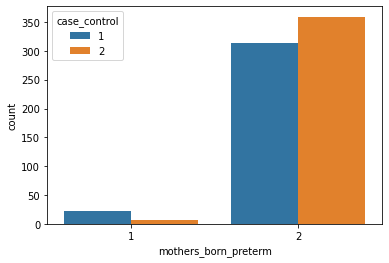

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x ='mothers_born_preterm', data = df, hue = 'case_control');

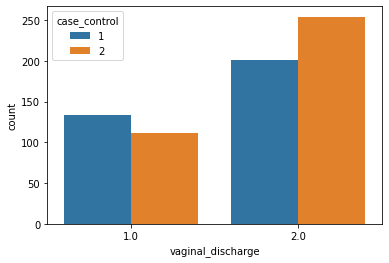

In [27]:
sns.countplot(x ='vaginal_discharge', data = df, hue = 'case_control');

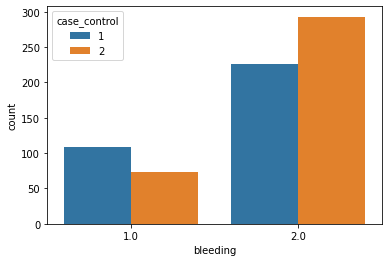

In [28]:
sns.countplot(x ='bleeding', data = df, hue = 'case_control');

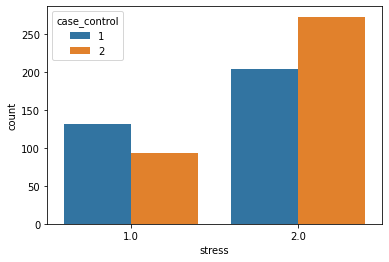

In [29]:
sns.countplot(x ='stress', data = df, hue = 'case_control');

In [30]:
df

,case_control,maternity,mother's_age,resident_by_domicile,water_piped,color_race,color_race/group,Maternal_education,maternal_occupation,job,person_sustain_who,age_range_person_sustain,family_structure,age_range_maternal,BMI_classif,abdominal_surgery_previous,asthma_previous,diabetes_previous,hypertension_previous,parity,premature_child_previous,child_underweight_previous,death_child1,periodontal_disease_previous,pregnancy_planning,treatment_fertility,city,interpregnancy_interval,abortion_previous,caesarean_previous,physical_activity,stress,physical_injury,vigorous_activity,tt_depression,prenatal_care,marriage_duration,smoking,Mother's_reaction,Father's_reaction,Family_reaction,drinking_alcohol,work_pregnancy,work_standing,physical_effort_work,bleeding,anaemia,vaginal_discharge,urinary_tract_infection,genitat_tract_infection,abnormal_amniotic,diabetes_gestational,hypertension,hospitalization,syphilis,baby_sex,type_gestation,congenital_anomalies,delivery,mothers_born_preterm,psychoactive_drugs,abortion_attempt,occupation_person_sustain,place_of_residence,householde_income
0,1,1,38,1,1,2,1,3,3,2.0,3,2.0,1,3,4.0,2.0,2,2,1,3,2,2,2,2,1.0,2.0,2,3,1,2.0,1,1.0,2,1,2,1,2,2,1,1.0,1.0,2,2,2,2,2.0,1,2.0,2.0,2,2,2,3,2,2,2,2,2,1,2,2,2,2.0,1,99.968061
1,2,1,20,1,2,1,1,2,2,2.0,3,2.0,1,1,3.0,2.0,2,2,2,2,2,2,2,2,1.0,2.0,2,4,2,0.0,1,2.0,2,2,2,1,1,2,1,2.0,2.0,2,1,2,2,2.0,2,1.0,1.0,2,2,2,1,1,2,2,2,2,1,2,2,2,2.0,2,328.968381
2,2,1,15,1,2,1,1,3,3,2.0,1,1.0,2,2,1.0,2.0,2,2,2,2,2,2,2,2,2.0,2.0,1,4,2,0.0,2,1.0,2,2,2,1,1,2,2,2.0,1.0,2,2,2,2,1.0,1,2.0,1.0,2,2,2,1,1,2,2,2,2,1,2,2,2,2.0,1,47.908017
3,1,1,24,1,2,1,1,3,3,2.0,1,1.0,2,1,4.0,2.0,1,2,1,3,2,2,2,2,1.0,2.0,1,3,1,1.0,1,1.0,2,1,2,4,2,2,1,2.0,1.0,2,2,2,2,1.0,2,1.0,1.0,2,2,2,2,1,2,1,2,2,1,2,2,2,2.0,1,281.060364
5,2,1,21,2,2,1,1,2,3,1.0,3,2.0,1,1,1.0,2.0,2,2,2,2,2,2,2,2,1.0,2.0,2,4,2,0.0,1,2.0,2,2,2,2,1,2,1,1.0,1.0,2,2,2,2,2.0,1,2.0,1.0,2,2,2,1,2,2,1,2,2,2,2,2,2,1.0,2,281.060364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,2,2,28,2,2,1,1,1,2,2.0,1,1.0,2,1,3.0,2.0,2,2,2,1,2,2,2,2,2.0,2.0,1,3,2,2.0,1,2.0,2,2,2,1,2,2,2,2.0,2.0,2,1,1,2,2.0,2,2.0,2.0,2,2,2,1,2,2,1,2,2,1,2,2,2,2.0,1,458.958799
775,2,2,21,1,2,1,1,2,2,1.0,2,1.0,2,1,1.0,2.0,2,2,2,2,2,2,2,2,2.0,2.0,1,4,2,0.0,2,2.0,2,2,2,1,2,2,2,2.0,2.0,2,1,1,2,2.0,1,2.0,1.0,2,2,2,1,2,2,1,2,2,1,2,2,2,2.0,2,299.265410
776,2,2,24,2,2,1,1,2,3,3.0,1,2.0,2,1,4.0,2.0,2,2,2,1,2,2,2,2,2.0,2.0,1,3,2,1.0,2,2.0,2,2,2,1,2,2,2,2.0,2.0,2,2,2,2,2.0,2,1.0,2.0,1,1,2,2,1,2,1,2,2,1,2,2,2,4.0,2,281.060364
777,2,2,21,2,2,1,1,3,4,3.0,2,1.0,1,1,3.0,2.0,2,2,2,1,2,2,2,2,1.0,2.0,1,1,2,1.0,1,2.0,2,2,2,2,1,2,1,2.0,2.0,2,2,2,2,2.0,2,2.0,2.0,2,2,2,1,2,2,1,2,2,2,2,2,2,4.0,2,319.386777


In [31]:
df.columns.to_list()

['case_control',
 'maternity',
 "mother's_age",
 'resident_by_domicile',
 'water_piped',
 'color_race',
 'color_race/group',
 'Maternal_education ',
 'maternal_occupation',
 'job',
 'person_sustain_who',
 'age_range_person_sustain',
 'family_structure',
 'age_range_maternal',
 'BMI_classif',
 'abdominal_surgery_previous',
 'asthma_previous',
 'diabetes_previous',
 'hypertension_previous',
 'parity',
 'premature_child_previous',
 'child_underweight_previous',
 'death_child1',
 'periodontal_disease_previous',
 'pregnancy_planning',
 'treatment_fertility',
 'city',
 'interpregnancy_interval',
 'abortion_previous',
 'caesarean_previous',
 'physical_activity',
 'stress',
 'physical_injury',
 'vigorous_activity',
 'tt_depression',
 'prenatal_care',
 'marriage_duration',
 'smoking',
 "Mother's_reaction",
 "Father's_reaction",
 'Family_reaction',
 'drinking_alcohol',
 'work_pregnancy',
 'work_standing',
 'physical_effort_work',
 'bleeding',
 'anaemia',
 'vaginal_discharge',
 'urinary_tract_inf

In [32]:
# df_col_list = df.columns.to_list()
# for x in df_col_list:
#     print(df[x].describe())
df.describe()

,case_control,maternity,mother's_age,resident_by_domicile,water_piped,color_race,color_race/group,Maternal_education,maternal_occupation,job,person_sustain_who,age_range_person_sustain,family_structure,age_range_maternal,BMI_classif,abdominal_surgery_previous,asthma_previous,diabetes_previous,hypertension_previous,parity,premature_child_previous,child_underweight_previous,death_child1,periodontal_disease_previous,pregnancy_planning,treatment_fertility,city,interpregnancy_interval,abortion_previous,caesarean_previous,physical_activity,stress,physical_injury,vigorous_activity,tt_depression,prenatal_care,marriage_duration,smoking,Mother's_reaction,Father's_reaction,Family_reaction,drinking_alcohol,work_pregnancy,work_standing,physical_effort_work,bleeding,anaemia,vaginal_discharge,urinary_tract_infection,genitat_tract_infection,abnormal_amniotic,diabetes_gestational,hypertension,hospitalization,syphilis,baby_sex,type_gestation,congenital_anomalies,delivery,mothers_born_preterm,psychoactive_drugs,abortion_attempt,occupation_person_sustain,place_of_residence,householde_income
count,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000
mean,1.522111,1.109843,25.158345,1.597718,1.718973,1.426534,1.146933,2.092725,2.656205,1.487874,1.566334,1.633381,1.629101,1.442225,2.011412,1.920114,1.950071,1.990014,1.890157,1.590585,1.901569,1.904422,1.977175,1.958631,1.345221,1.981455,1.589158,2.972896,1.834522,0.978602,1.139800,1.680456,1.900143,1.693295,1.995720,1.724679,1.624822,1.931526,1.627675,1.774608,1.724679,1.977175,1.680456,1.797432,1.904422,1.740371,1.756063,1.649073,1.452211,1.948645,1.894437,1.980029,1.443652,1.778887,1.968616,1.504993,1.954351,1.975749,1.437946,1.958631,1.982882,1.990014,1.990014,1.670471,570.951249
std,0.499868,0.312917,6.737255,0.490708,0.449822,0.856460,0.354292,0.619877,0.641589,0.577120,0.853702,0.482225,0.483390,0.672851,1.153819,0.271310,0.217953,0.099499,0.312917,0.660625,0.298109,0.294221,0.149450,0.199285,0.475780,0.135007,0.492338,1.110010,0.371877,0.878862,0.347027,0.466633,0.300024,0.461455,0.065325,0.713005,0.484515,0.252737,0.483770,0.418139,0.446995,0.149450,0.466633,0.402200,0.294221,0.438744,0.429762,0.477601,0.498066,0.220879,0.307498,0.140002,0.786515,0.415293,0.174477,0.500332,0.208872,0.153938,0.496489,0.199285,0.129805,0.099499,0.586674,0.470378,779.932849
min,1.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.969339
25%,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.0000

# Variance Threshold

In [33]:
from sklearn.feature_selection import VarianceThreshold
var_thresh = VarianceThreshold() # by default the threshold = 0
var_thresh.fit(df)

VarianceThreshold()

In [34]:
var_thresh.get_support()
#No unvaried columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [35]:
X = df.drop(columns = ['case_control'])
y = df['case_control']
y.value_counts()

2    366
1    335
Name: case_control, dtype: int64

# Train Test Split and Pearson's

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier   #56
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 8)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = )
y_train.value_counts()

2    298
1    297
Name: case_control, dtype: int64

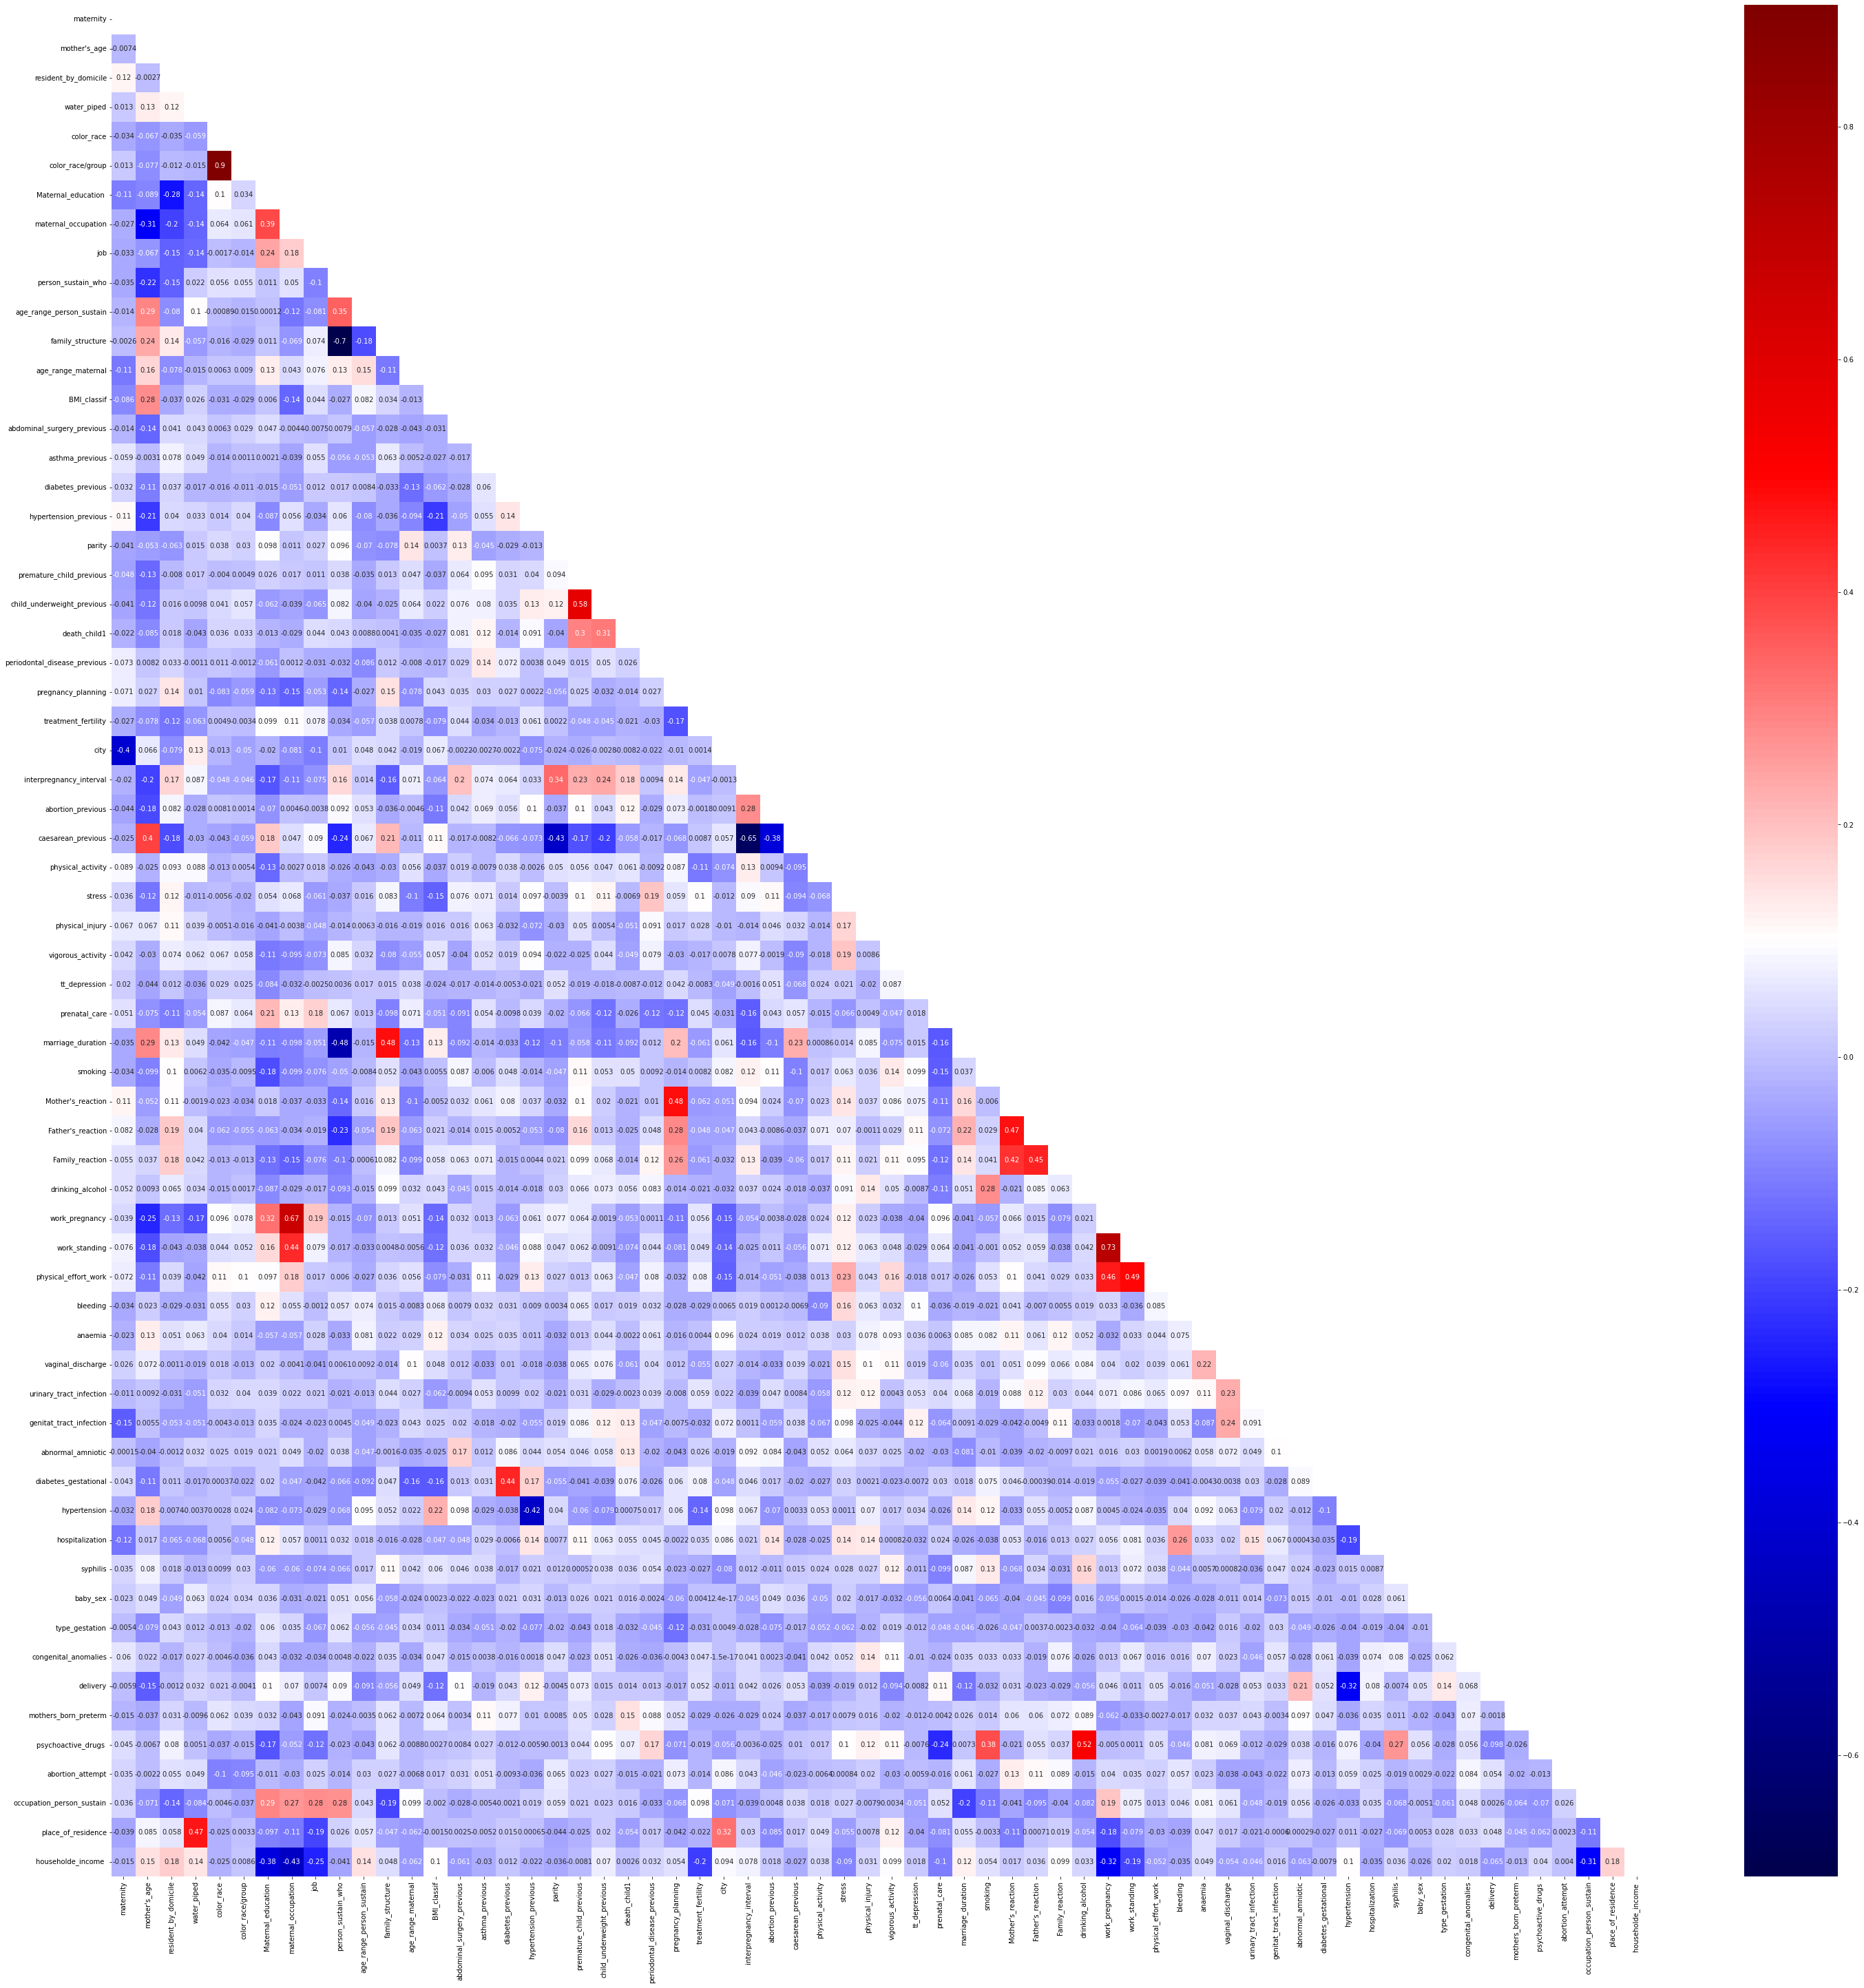

In [37]:
corr = X_train.corr()
mask1 = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (50,50))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1);

In [38]:
X_train.shape

(595, 64)

In [39]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [40]:
corr_features = correlation(X_train, 0.85) # 85% is a good value of the threshold
print(len(corr_features))
print(corr_features)

1
{'color_race/group'}


In [41]:
X_train = X_train.drop(columns = 'color_race/group')
X_train.shape

(595, 63)

In [42]:
X_test = X_test.drop(columns = 'color_race/group')
X_test.shape
y_test.value_counts

<bound method IndexOpsMixin.value_counts of 586    2
435    1
31     1
19     1
290    2
      ..
376    2
563    2
649    1
602    2
361    1
Name: case_control, Length: 106, dtype: int64>

In [43]:
X_train_mt = X_train
X_test_mt = X_test
X_mt = X

In [44]:
y_test.value_counts()

2    68
1    38
Name: case_control, dtype: int64

# Mutual Info/Information gain

In [45]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train, random_state = 20)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mt_list = mutual_info.to_list()
mutual_info.sort_values(ascending = False)
i = 0
for x in mutual_info.index:
    
    i+=1
i = 0   

In [46]:
i = 0
for x in mutual_info.index:
    if mutual_info[i] == 0:
        X_train_mt = X_train_mt.drop(columns = x)
        X_test_mt = X_test_mt.drop(columns = x)
        X_mt = X_mt.drop(columns = x)
    i+=1
i = 0   

In [47]:
print(X_train.shape)
print(X_test.shape)
print(X_train_mt.shape)
print(X_test_mt.shape)


(595, 63)
(106, 63)
(595, 35)
(106, 35)


In [48]:
X_train

,maternity,mother's_age,resident_by_domicile,water_piped,color_race,Maternal_education,maternal_occupation,job,person_sustain_who,age_range_person_sustain,family_structure,age_range_maternal,BMI_classif,abdominal_surgery_previous,asthma_previous,diabetes_previous,hypertension_previous,parity,premature_child_previous,child_underweight_previous,death_child1,periodontal_disease_previous,pregnancy_planning,treatment_fertility,city,interpregnancy_interval,abortion_previous,caesarean_previous,physical_activity,stress,physical_injury,vigorous_activity,tt_depression,prenatal_care,marriage_duration,smoking,Mother's_reaction,Father's_reaction,Family_reaction,drinking_alcohol,work_pregnancy,work_standing,physical_effort_work,bleeding,anaemia,vaginal_discharge,urinary_tract_infection,genitat_tract_infection,abnormal_amniotic,diabetes_gestational,hypertension,hospitalization,syphilis,baby_sex,type_gestation,congenital_anomalies,delivery,mothers_born_preterm,psychoactive_drugs,abortion_attempt,occupation_person_sustain,place_of_residence,householde_income
61,1,25,2,2,1,1,2,1.0,1,1.0,2,1,4.0,2.0,2,2,1,2,2,2,2,2,1.0,2.0,2,4,2,0.0,2,1.0,2,1,2,1,2,2,1,2.0,2.0,2,1,1,1,2.0,2,2.0,1.0,2,2,2,1,2,2,1,2,2,1,2,2,2,1.0,2,1481.954647
243,1,24,2,2,1,2,2,1.0,1,1.0,2,1,1.0,2.0,2,2,2,2,2,2,2,2,2.0,2.0,2,4,2,0.0,1,2.0,2,2,2,1,2,2,2,2.0,2.0,2,1,1,2,2.0,2,2.0,1.0,2,2,2,1,1,2,1,2,2,2,2,2,2,2.0,2,894.282977
591,2,35,2,2,1,1,3,1.0,1,2.0,2,3,1.0,2.0,2,2,2,1,1,2,2,2,1.0,2.0,1,3,1,1.0,1,2.0,2,2,2,2,2,2,2,2.0,2.0,2,2,2,2,1.0,2,2.0,1.0,2,2,2,2,1,2,1,2,2,1,2,2,2,2.0,2,415.202811
539,2,30,2,2,1,1,1,1.0,1,2.0,2,1,1.0,2.0,2,2,2,1,2,2,2,2,2.0,2.0,1,1,1,2.0,2,2.0,2,2,2,3,1,2,2,2.0,2.0,2,1,2,2,2.0,2,2.0,1.0,2,2,2,1,2,2,1,2,2,1,2,2,2,2.0,2,2714.787608
459,1,30,2,2,2,2,2,1.0,1,2.0,2,1,1.0,2.0,2,2,2,1,2,2,2,2,2.0,2.0,2,3,2,2.0,1,2.0,2,2,2,1,2,2,2,2.0,2.0,2,1,2,2,2.0,2,2.0,2.0,2,2,2,1,2,2,2,2,2,2,2,2,2,2.0,2,670.712233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,1,37,2,2,1,2,3,1.0,1,2.0,2,3,1.0,2.0,2,2,2,1,2,2,2,2,1.0,2.0,2,3,1,2.0,1,2.0,2,2,2,1,1,2,1,2.0,2.0,2,2,2,2,1.0,2,2.0,2.0,2,2,2,1,2,2,2,2,2,2,2,2,2,2.0,2,479.080166
145,1,24,2,2,3,1,2,1.0,1,2.0,2,1,1.0,2.0,2,2,2,2,2,2,2,2,1.0,2.0,2,4,2,0.0,1,2.0,2,2,2,2,2,2,2,2.0,2.0,2,2,2,2,1.0,2,2.0,2.0,2,2,2,2,2,2,2,2,2,1,2,2,2,1.0,2,1277.547110
392,1,18,2,2,3,2,3,1.0,1,1.0,2,2,1.0,2.0,2,2,2,2,2,2,2,2,1.0,2.0,2,4,2,0.0,1,2.0,2,2,2,3,1,2,1,2.0,2.0,2,2,2,2,1.0,1,2.0,2.0,2,2,2,1,1,2,1,2,2,2,2,2,2,1.0,2,638.773555
370,1,18,1,2,1,2,3,1.0,3,2.0,1,2,1.0,2.0,2,2,2,2,2,2,2,2,1.0,2.0,2,4,2,0.0,1,2.0,2,2,2,2,1,2,1,2.0,1.0,2,2,2,2,1.0,2,2.0,2.0,2,2,2,3,1,1,1,2,2,1,2,2,2,2.0,2,906.100287


In [49]:
X_train_mt

,mother's_age,water_piped,color_race,job,family_structure,age_range_maternal,BMI_classif,abdominal_surgery_previous,premature_child_previous,child_underweight_previous,periodontal_disease_previous,pregnancy_planning,treatment_fertility,interpregnancy_interval,caesarean_previous,stress,vigorous_activity,prenatal_care,marriage_duration,Father's_reaction,Family_reaction,work_pregnancy,bleeding,anaemia,vaginal_discharge,urinary_tract_infection,abnormal_amniotic,hypertension,hospitalization,type_gestation,mothers_born_preterm,psychoactive_drugs,abortion_attempt,occupation_person_sustain,householde_income
61,25,2,1,1.0,2,1,4.0,2.0,2,2,2,1.0,2.0,4,0.0,1.0,1,1,2,2.0,2.0,1,2.0,2,2.0,1.0,2,1,2,2,2,2,2,1.0,1481.954647
243,24,2,1,1.0,2,1,1.0,2.0,2,2,2,2.0,2.0,4,0.0,2.0,2,1,2,2.0,2.0,1,2.0,2,2.0,1.0,2,1,1,2,2,2,2,2.0,894.282977
591,35,2,1,1.0,2,3,1.0,2.0,1,2,2,1.0,2.0,3,1.0,2.0,2,2,2,2.0,2.0,2,1.0,2,2.0,1.0,2,2,1,2,2,2,2,2.0,415.202811
539,30,2,1,1.0,2,1,1.0,2.0,2,2,2,2.0,2.0,1,2.0,2.0,2,3,1,2.0,2.0,1,2.0,2,2.0,1.0,2,1,2,2,2,2,2,2.0,2714.787608
459,30,2,2,1.0,2,1,1.0,2.0,2,2,2,2.0,2.0,3,2.0,2.0,2,1,2,2.0,2.0,1,2.0,2,2.0,2.0,2,1,2,2,2,2,2,2.0,670.712233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,37,2,1,1.0,2,3,1.0,2.0,2,2,2,1.0,2.0,3,2.0,2.0,2,1,1,2.0,2.0,2,1.0,2,2.0,2.0,2,1,2,2,2,2,2,2.0,479.080166
145,24,2,3,1.0,2,1,1.0,2.0,2,2,2,1.0,2.0,4,0.0,2.0,2,2,2,2.0,2.0,2,1.0,2,2.0,2.0,2,2,2,2,2,2,2,1.0,1277.547110
392,18,2,3,1.0,2,2,1.0,2.0,2,2,2,1.0,2.0,4,0.0,2.0,2,3,1,2.0,2.0,2,1.0,1,2.0,2.0,2,1,1,2,2,2,2,1.0,638.773555
370,18,2,1,1.0,1,2,1.0,2.0,2,2,2,1.0,2.0,4,0.0,2.0,2,2,1,2.0,1.0,2,1.0,2,2.0,2.0,2,3,1,2,2,2,2,2.0,906.100287


# Decision Tree

Depth =  2 , Training Accuracy =  0.6302521008403361 , Test Accuracy =  0.6981132075471698 , Diff =  6.786110670683366  %
Depth =  3 , Training Accuracy =  0.6621848739495798 , Test Accuracy =  0.7452830188679245 , Diff =  8.309814491834466  %
Depth =  4 , Training Accuracy =  0.6957983193277311 , Test Accuracy =  0.7547169811320755 , Diff =  5.891866180434446  %
Depth =  5 , Training Accuracy =  0.7344537815126051 , Test Accuracy =  0.6981132075471698 , Diff =  3.634057396543533  %
Depth =  6 , Training Accuracy =  0.7747899159663866 , Test Accuracy =  0.7641509433962265 , Diff =  1.063897257016011  %
Depth =  7 , Training Accuracy =  0.8084033613445378 , Test Accuracy =  0.7641509433962265 , Diff =  4.425241794831136  %
Depth =  8 , Training Accuracy =  0.8403361344537815 , Test Accuracy =  0.660377358490566 , Diff =  17.995877596321552  %
Depth =  9 , Training Accuracy =  0.865546218487395 , Test Accuracy =  0.6320754716981132 , Diff =  23.34707467892818  %
Depth =  10 , Training Ac

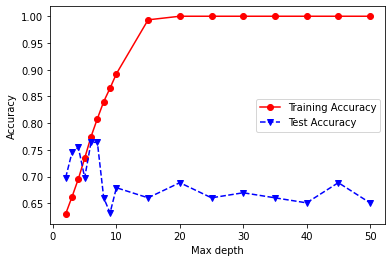

In [50]:
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    

import matplotlib.pyplot as plt
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

In [51]:
dt = DecisionTreeClassifier(max_depth = 6)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Accuracy test: ", accuracy_score(y_pred, y_test) * 100)
dt_att = accuracy_score(y_pred, y_test) * 100
print("Accuracy train: ", accuracy_score(y_train, dt.predict(X_train)) * 100)
dt_atr = accuracy_score(y_train, dt.predict(X_train)) * 100
cm = confusion_matrix(y_test, dt.predict(X_test))
print(cm)
print(classification_report(y_test,y_pred))
auc_dt = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])
print(auc_dt)

Accuracy test:  76.41509433962264
Accuracy train:  77.47899159663866
[[24 14]
 [11 57]]
              precision    recall  f1-score   support

           1       0.69      0.63      0.66        38
           2       0.80      0.84      0.82        68

    accuracy                           0.76       106
   macro avg       0.74      0.73      0.74       106
weighted avg       0.76      0.76      0.76       106

0.7356811145510835


# Decisio tree info gain

Depth =  2 , Training Accuracy =  0.6302521008403361 , Test Accuracy =  0.6981132075471698 , Diff =  6.786110670683366  %
Depth =  3 , Training Accuracy =  0.6588235294117647 , Test Accuracy =  0.7358490566037735 , Diff =  7.702552719200884  %
Depth =  4 , Training Accuracy =  0.680672268907563 , Test Accuracy =  0.7735849056603774 , Diff =  9.291263675281435  %
Depth =  5 , Training Accuracy =  0.7025210084033613 , Test Accuracy =  0.6981132075471698 , Diff =  0.4407800856191524  %
Depth =  6 , Training Accuracy =  0.7411764705882353 , Test Accuracy =  0.7924528301886793 , Diff =  5.127635960044397  %
Depth =  7 , Training Accuracy =  0.7815126050420168 , Test Accuracy =  0.7452830188679245 , Diff =  3.622958617409233  %
Depth =  8 , Training Accuracy =  0.8218487394957983 , Test Accuracy =  0.7735849056603774 , Diff =  4.826383383542088  %
Depth =  9 , Training Accuracy =  0.8420168067226891 , Test Accuracy =  0.7452830188679245 , Diff =  9.67337878547646  %
Depth =  10 , Training Ac

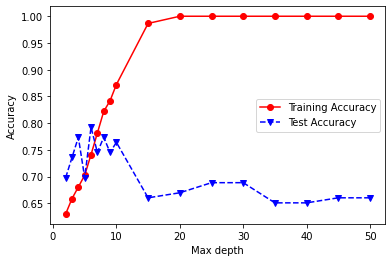

In [54]:
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train_mt, y_train)
    y_predTrain = clf.predict(X_train_mt)
    y_predTest = clf.predict(X_test_mt)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    

import matplotlib.pyplot as plt
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

In [55]:
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train_mt, y_train)
y_pred = dt.predict(X_test_mt)
print("Accuracy test: ", accuracy_score(y_pred, y_test) * 100)
dt_mt_att = accuracy_score(y_pred, y_test) * 100
print("Accuracy train: ", accuracy_score(y_train, dt.predict(X_train_mt)) * 100)
dt_mt_atr = accuracy_score(y_train, dt.predict(X_train_mt)) * 100
cm = confusion_matrix(y_test, dt.predict(X_test_mt))
print(cm)
print(classification_report(y_test,y_pred))
auc_dt = roc_auc_score(y_test, dt.predict_proba(X_test_mt)[:, 1])
print(auc_dt)

Accuracy test:  69.81132075471697
Accuracy train:  70.25210084033613
[[26 12]
 [20 48]]
              precision    recall  f1-score   support

           1       0.57      0.68      0.62        38
           2       0.80      0.71      0.75        68

    accuracy                           0.70       106
   macro avg       0.68      0.70      0.68       106
weighted avg       0.72      0.70      0.70       106

0.7445820433436533


# Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
RF_params = {'n_estimators': [50,100,150,200,320,350,400,450],
               'max_features': ['log2','sqrt', 'auto'],
               'max_depth': [1,2,3,4,5,6,7,8,9,10],
               'min_samples_split': [2,5,10,15, 20],
               'min_samples_leaf': [2,5,10,15,20],
                'criterion':['entropy'],
                 'random_state': [10]

}
print(RF_params)

{'n_estimators': [50, 100, 150, 200, 320, 350, 400, 450], 'max_features': ['log2', 'sqrt', 'auto'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [2, 5, 10, 15, 20], 'criterion': ['entropy'], 'random_state': [10]}


In [57]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=RF_params,cv=3,n_jobs=-1,verbose=1)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 6000 candidates, totalling 18000 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [2, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'n_estimators': [50, 100, 150, 200, 320, 350, 400,
                                          450],
                         'random_state': [10]},
             verbose=1)

In [58]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=15,
                       n_estimators=200, random_state=10)

In [57]:
model = RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth = 5,
                             max_features='sqrt',min_samples_leaf= 2,min_samples_split = 15, random_state= 10).fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,model.predict(X_test)))
print("Accuracy test: ", accuracy_score(y_test,predictions)*100)
rf_att = accuracy_score(y_test,predictions)*100
print("Accuracy train: ", accuracy_score(y_train, model.predict(X_train))*100)
rf_atr = accuracy_score(y_train, model.predict(X_train))*100
print(classification_report(y_test,predictions))
auc_dt = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(auc_dt)

[[25 13]
 [ 9 59]]
Accuracy test:  79.24528301886792
Accuracy train:  80.33613445378151
              precision    recall  f1-score   support

           1       0.74      0.66      0.69        38
           2       0.82      0.87      0.84        68

    accuracy                           0.79       106
   macro avg       0.78      0.76      0.77       106
weighted avg       0.79      0.79      0.79       106

0.8188854489164086


# Random forest info gain

In [60]:
rf_mt=RandomForestClassifier()
grid_search_mt=GridSearchCV(estimator=rf_mt,param_grid=RF_params,cv=3,n_jobs=-1,verbose=1)
grid_search_mt.fit(X_train_mt,y_train)

Fitting 3 folds for each of 6000 candidates, totalling 18000 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [2, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'n_estimators': [50, 100, 150, 200, 320, 350, 400,
                                          450],
                         'random_state': [10]},
             verbose=1)

In [61]:
grid_search_mt.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=6, max_features='log2',
                       min_samples_leaf=2, n_estimators=320, random_state=10)

In [72]:
X_train

,maternity,mother's_age,resident_by_domicile,water_piped,color_race,Maternal_education,maternal_occupation,job,person_sustain_who,age_range_person_sustain,family_structure,age_range_maternal,BMI_classif,abdominal_surgery_previous,asthma_previous,diabetes_previous,hypertension_previous,parity,premature_child_previous,child_underweight_previous,death_child1,periodontal_disease_previous,pregnancy_planning,treatment_fertility,city,interpregnancy_interval,abortion_previous,caesarean_previous,physical_activity,stress,physical_injury,vigorous_activity,tt_depression,prenatal_care,marriage_duration,smoking,Mother's_reaction,Father's_reaction,Family_reaction,drinking_alcohol,work_pregnancy,work_standing,physical_effort_work,bleeding,anaemia,vaginal_discharge,urinary_tract_infection,genitat_tract_infection,abnormal_amniotic,diabetes_gestational,hypertension,hospitalization,syphilis,baby_sex,type_gestation,congenital_anomalies,delivery,mothers_born_preterm,psychoactive_drugs,abortion_attempt,occupation_person_sustain,place_of_residence,householde_income
61,1,25,2,2,1,1,2,1.0,1,1.0,2,1,4.0,2.0,2,2,1,2,2,2,2,2,1.0,2.0,2,4,2,0.0,2,1.0,2,1,2,1,2,2,1,2.0,2.0,2,1,1,1,2.0,2,2.0,1.0,2,2,2,1,2,2,1,2,2,1,2,2,2,1.0,2,1481.954647
243,1,24,2,2,1,2,2,1.0,1,1.0,2,1,1.0,2.0,2,2,2,2,2,2,2,2,2.0,2.0,2,4,2,0.0,1,2.0,2,2,2,1,2,2,2,2.0,2.0,2,1,1,2,2.0,2,2.0,1.0,2,2,2,1,1,2,1,2,2,2,2,2,2,2.0,2,894.282977
591,2,35,2,2,1,1,3,1.0,1,2.0,2,3,1.0,2.0,2,2,2,1,1,2,2,2,1.0,2.0,1,3,1,1.0,1,2.0,2,2,2,2,2,2,2,2.0,2.0,2,2,2,2,1.0,2,2.0,1.0,2,2,2,2,1,2,1,2,2,1,2,2,2,2.0,2,415.202811
539,2,30,2,2,1,1,1,1.0,1,2.0,2,1,1.0,2.0,2,2,2,1,2,2,2,2,2.0,2.0,1,1,1,2.0,2,2.0,2,2,2,3,1,2,2,2.0,2.0,2,1,2,2,2.0,2,2.0,1.0,2,2,2,1,2,2,1,2,2,1,2,2,2,2.0,2,2714.787608
459,1,30,2,2,2,2,2,1.0,1,2.0,2,1,1.0,2.0,2,2,2,1,2,2,2,2,2.0,2.0,2,3,2,2.0,1,2.0,2,2,2,1,2,2,2,2.0,2.0,2,1,2,2,2.0,2,2.0,2.0,2,2,2,1,2,2,2,2,2,2,2,2,2,2.0,2,670.712233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,1,37,2,2,1,2,3,1.0,1,2.0,2,3,1.0,2.0,2,2,2,1,2,2,2,2,1.0,2.0,2,3,1,2.0,1,2.0,2,2,2,1,1,2,1,2.0,2.0,2,2,2,2,1.0,2,2.0,2.0,2,2,2,1,2,2,2,2,2,2,2,2,2,2.0,2,479.080166
145,1,24,2,2,3,1,2,1.0,1,2.0,2,1,1.0,2.0,2,2,2,2,2,2,2,2,1.0,2.0,2,4,2,0.0,1,2.0,2,2,2,2,2,2,2,2.0,2.0,2,2,2,2,1.0,2,2.0,2.0,2,2,2,2,2,2,2,2,2,1,2,2,2,1.0,2,1277.547110
392,1,18,2,2,3,2,3,1.0,1,1.0,2,2,1.0,2.0,2,2,2,2,2,2,2,2,1.0,2.0,2,4,2,0.0,1,2.0,2,2,2,3,1,2,1,2.0,2.0,2,2,2,2,1.0,1,2.0,2.0,2,2,2,1,1,2,1,2,2,2,2,2,2,1.0,2,638.773555
370,1,18,1,2,1,2,3,1.0,3,2.0,1,2,1.0,2.0,2,2,2,2,2,2,2,2,1.0,2.0,2,4,2,0.0,1,2.0,2,2,2,2,1,2,1,2.0,1.0,2,2,2,2,1.0,2,2.0,2.0,2,2,2,3,1,1,1,2,2,1,2,2,2,2.0,2,906.100287


In [58]:
model_mt = RandomForestClassifier(n_estimators=320,criterion='entropy',max_depth = 6,
                             max_features='log2',min_samples_leaf= 2,min_samples_split = 15, random_state= 10).fit(X_train_mt,y_train)
predictions=model_mt.predict(X_test_mt)
print(confusion_matrix(y_test,model_mt.predict(X_test_mt)))
print("Accuracy test: ", accuracy_score(y_test,predictions)*100)
rf_mt_att = accuracy_score(y_test,predictions)*100
print("Accuracy train: ", accuracy_score(y_train, model_mt.predict(X_train_mt))*100)
rf_mt_atr = accuracy_score(y_train, model_mt.predict(X_train_mt))*100
print(classification_report(y_test,predictions))
auc_dt = roc_auc_score(y_test, model_mt.predict_proba(X_test_mt)[:, 1])
print(auc_dt)

[[26 12]
 [10 58]]
Accuracy test:  79.24528301886792
Accuracy train:  80.16806722689076
              precision    recall  f1-score   support

           1       0.72      0.68      0.70        38
           2       0.83      0.85      0.84        68

    accuracy                           0.79       106
   macro avg       0.78      0.77      0.77       106
weighted avg       0.79      0.79      0.79       106

0.8022445820433436


# Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [60]:
print("Train Accuracy: ", accuracy_score(y_train, gnb.predict(X_train)))
nb_atr = accuracy_score(y_train, gnb.predict(X_train))*100
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
nb_att = accuracy_score(y_test, y_pred)*100

Train Accuracy:  0.6571428571428571
Test Accuracy:  0.7452830188679245


In [61]:
gnb.predict_proba(X_test[:10])

array([[1.29064087e-03, 9.98709359e-01],
       [8.11531091e-05, 9.99918847e-01],
       [1.65320029e-01, 8.34679971e-01],
       [9.99993228e-01, 6.77175801e-06],
       [1.05401835e-03, 9.98945982e-01],
       [8.02556814e-01, 1.97443186e-01],
       [3.18727841e-06, 9.99996813e-01],
       [4.62860538e-01, 5.37139462e-01],
       [2.06534459e-03, 9.97934655e-01],
       [5.29945104e-04, 9.99470055e-01]])

In [62]:
print(confusion_matrix(y_test,gnb.predict(X_test)))
print(classification_report(y_test,y_pred))
auc_dt = roc_auc_score(y_test, gnb.predict_proba(X_test)[:, 1])
print(auc_dt)

[[22 16]
 [11 57]]
              precision    recall  f1-score   support

           1       0.67      0.58      0.62        38
           2       0.78      0.84      0.81        68

    accuracy                           0.75       106
   macro avg       0.72      0.71      0.71       106
weighted avg       0.74      0.75      0.74       106

0.7732198142414861


# Naive Bayes information gain

In [63]:
gnb.fit(X_train_mt, y_train)
y_pred = gnb.predict(X_test_mt)

In [64]:
gnb.predict_proba(X_test_mt[:10])

array([[3.34148101e-03, 9.96658519e-01],
       [1.21891420e-03, 9.98781086e-01],
       [6.67540546e-01, 3.32459454e-01],
       [9.97305914e-01, 2.69408555e-03],
       [8.43588728e-03, 9.91564113e-01],
       [9.68875056e-01, 3.11249436e-02],
       [9.99995367e-01, 4.63313127e-06],
       [1.00000000e+00, 4.49390755e-11],
       [4.81979191e-02, 9.51802081e-01],
       [4.25708305e-03, 9.95742917e-01]])

In [65]:
print("Train Accuracy: ", accuracy_score(y_train, gnb.predict(X_train_mt)))
nb_mt_atr = accuracy_score(y_train, gnb.predict(X_train_mt))*100
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
nb_mt_att = accuracy_score(y_test, y_pred)*100

Train Accuracy:  0.6521008403361345
Test Accuracy:  0.7452830188679245


In [66]:
print(confusion_matrix(y_test,gnb.predict(X_test_mt)))
print(classification_report(y_test,y_pred))
auc_dt = roc_auc_score(y_test, gnb.predict_proba(X_test_mt)[:, 1])
print(auc_dt)

[[21 17]
 [10 58]]
              precision    recall  f1-score   support

           1       0.68      0.55      0.61        38
           2       0.77      0.85      0.81        68

    accuracy                           0.75       106
   macro avg       0.73      0.70      0.71       106
weighted avg       0.74      0.75      0.74       106

0.8092105263157895


# XGBoost

In [67]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
XGboost_params = {
    'learning_rate': [0.045, 0.043],
    'n_estimators': [int(i) for i in range(10,150,20)],
    'max_depth': [int(i) for i in range(10,30,1)],
    'min_child_weight': [int(i) for i in range(1,6,1)],
    'gamma':[0],
    'subsample':[0.8],
    'colsample_bytree':[0.8],
    'objective':['binary:logistic'],
    'nthread':[-1],
   
}

In [65]:
print(XGboost_params)

{'learning_rate': [0.045, 0.043], 'n_estimators': [10, 30, 50, 70, 90, 110, 130], 'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'min_child_weight': [1, 2, 3, 4, 5], 'gamma': [0], 'subsample': [0.8], 'colsample_bytree': [0.8], 'objective': ['binary:logistic'], 'nthread': [-1]}


In [ ]:
xgb = XGBClassifier()
grid_search=GridSearchCV(estimator=xgb,param_grid = XGboost_params,cv = 3,n_jobs=-1,verbose=1)
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_estimator_

In [68]:
xb = XGBClassifier(booster='gbtree', colsample_bylevel=0,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.045, max_delta_step=0, max_depth=4,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=130, n_jobs=8, nthread=-1, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)
xb.fit(X_train, y_train)
yxb = xb.predict(X_test)
print("Test Accuracy: ", accuracy_score(yxb, y_test))
xb_att = accuracy_score(yxb, y_test)
print("Train Accuracy: ", accuracy_score(y_train, xb.predict(X_train)))
xb_atr = accuracy_score(y_train, xb.predict(X_train))
print(confusion_matrix(y_test,xb.predict(X_test)))
print(classification_report(y_test,yxb))
auc_dt = roc_auc_score(y_test, xb.predict_proba(X_test)[:, 1])
print(auc_dt)

[17:46:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test Accuracy:  0.7641509433962265
Train Accuracy:  0.7663865546218488
[[23 15]
 [10 58]]
              precision    recall  f1-score   support

           1       0.70      0.61      0.65        38
           2       0.79      0.85      0.82        68

    accuracy                           0.76       106
   macro avg       0.75      0.73      0.74       106
weighted avg       0.76      0.76      0.76       106

0.7681888544891642


# XGBoost Info Gain

In [187]:
# xgb = XGBClassifier()
# grid_search_mt=GridSearchCV(estimator=xgb,param_grid = XGboost_params,cv = 3,n_jobs=-1,verbose=1)
# grid_search_mt.fit(X_train_mt,y_train)

In [188]:
# grid_search_mt.best_estimator_

In [69]:
xb_mt = XGBClassifier(booster='gbtree', colsample_bylevel=0,
              colsample_bynode= 1, colsample_bytree=1,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.045, max_delta_step=0, max_depth=15,
              min_child_weight=2,  monotone_constraints='()',
              n_estimators=100, n_jobs=8, nthread=3, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)
xb_mt.fit(X_train_mt, y_train)
yxb_mt = xb_mt.predict(X_test_mt)
print("Test Accuracy: ",accuracy_score(yxb_mt, y_test))
xb_mt_att = accuracy_score(yxb_mt, y_test)
print("Train Accuracy: ",accuracy_score(y_train, xb_mt.predict(X_train_mt)))
xb_mt_atr = accuracy_score(y_train, xb_mt.predict(X_train_mt))
print(confusion_matrix(y_test,xb_mt.predict(X_test_mt)))
print(classification_report(y_test,yxb))
auc_dt = roc_auc_score(y_test, xb_mt.predict_proba(X_test_mt)[:, 1])
print(auc_dt)

[17:46:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test Accuracy:  0.7264150943396226
Train Accuracy:  0.7680672268907563
[[25 13]
 [16 52]]
              precision    recall  f1-score   support

           1       0.70      0.61      0.65        38
           2       0.79      0.85      0.82        68

    accuracy                           0.76       106
   macro avg       0.75      0.73      0.74       106
weighted avg       0.76      0.76      0.76       106

0.7658668730650154


# KNearestNeighbour 

In [190]:
s = X_train.columns.to_list()

In [191]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
scaler = MinMaxScaler()
scaler.fit(X_train[s])
X_train[s] = scaler.transform(X_train[s])
X_test[s] = scaler.transform(X_test[s])
KNeighborsClassifier().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [199]:
X_train

,maternity,mother's_age,resident_by_domicile,water_piped,color_race,Maternal_education,maternal_occupation,job,person_sustain_who,age_range_person_sustain,family_structure,age_range_maternal,BMI_classif,abdominal_surgery_previous,asthma_previous,diabetes_previous,hypertension_previous,parity,premature_child_previous,child_underweight_previous,death_child1,periodontal_disease_previous,pregnancy_planning,treatment_fertility,city,interpregnancy_interval,abortion_previous,caesarean_previous,physical_activity,stress,physical_injury,vigorous_activity,tt_depression,prenatal_care,marriage_duration,smoking,Mother's_reaction,Father's_reaction,Family_reaction,drinking_alcohol,work_pregnancy,work_standing,physical_effort_work,bleeding,anaemia,vaginal_discharge,urinary_tract_infection,genitat_tract_infection,abnormal_amniotic,diabetes_gestational,hypertension,hospitalization,syphilis,baby_sex,type_gestation,congenital_anomalies,delivery,mothers_born_preterm,psychoactive_drugs,abortion_attempt,occupation_person_sustain,place_of_residence,householde_income
61,0.0,0.324324,1.0,1.0,0.00,0.0,0.333333,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.5,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.000000,1.0,0.102113
243,0.0,0.297297,1.0,1.0,0.00,0.5,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.333333,1.0,0.061179
591,1.0,0.594595,1.0,1.0,0.00,0.0,0.666667,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.666667,0.0,0.5,0.0,1.0,1.0,1.0,1.0,0.333333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.333333,1.0,0.027809
539,1.0,0.459459,1.0,1.0,0.00,0.0,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.666667,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.333333,1.0,0.187987
459,0.0,0.459459,1.0,1.0,0.25,0.5,0.333333,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.666667,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.333333,1.0,0.045606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.0,0.648649,1.0,1.0,0.00,0.5,0.666667,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.666667,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.333333,1.0,0.032258
145,0.0,0.297297,1.0,1.0,0.50,0.0,0.333333,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.000000,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.333333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.000000,1.0,0.087875
392,0.0,0.135135,1.0,1.0,0.50,0.5,0.666667,0.0,0.0,0.0,1.0,0.5,0.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.000000,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.666667,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,1.0,0.043382
370,0.0,0.135135,0.0,1.0,0.00,0.5,0.666667,0.0,1.0,1.0,0.0,0.5,0.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.000000,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.333333,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.333333,1.0,0.062002


In [70]:
KNN_params_Eu = {'n_neighbors': [int(i) for i in range(0,61)],
                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                 'metric':['minkowski'],
                 'p':[2],
                 'n_jobs': [-1]

}
KNN_params_Mh = {
                'n_neighbors': [int(i) for i in range(0,61)],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'p':[1],
                'n_jobs': [-1]
}
print(KNN_params_Eu)
print(KNN_params_Mh)

{'n_neighbors': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric': ['minkowski'], 'p': [2], 'n_jobs': [-1]}
{'n_neighbors': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1], 'n_jobs': [-1]}


# KNN Euclidean Distance

In [74]:
from sklearn.neighbors import KNeighborsClassifier
KNN_eu = KNeighborsClassifier()
grid_search_KNN=GridSearchCV(estimator=KNN_eu,param_grid=KNN_params_Eu,cv=10,n_jobs=-1,verbose=1)
grid_search_KNN.fit(X_train,y_train)

Fitting 10 folds for each of 244 candidates, totalling 2440 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski'], 'n_jobs': [-1],
                         'n_neighbors': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                         12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
                                         22, 23, 24, 25, 26, 27, 28, 29, ...],
                         'p': [2]},
             verbose=1)

In [75]:
grid_search_KNN.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=27)

In [76]:
k = range(1, 60)
train_acc = []
test_acc = []
for x in k:
    knn_clf = KNeighborsClassifier(n_neighbors = x, metric = 'minkowski', p = 2, n_jobs = -1) # Euclidean Distance Metric
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    train_acc.append(accuracy_score(y_train, knn_clf.predict(X_train)))
    test_acc.append(accuracy_score(y_test, y_pred))
    
    

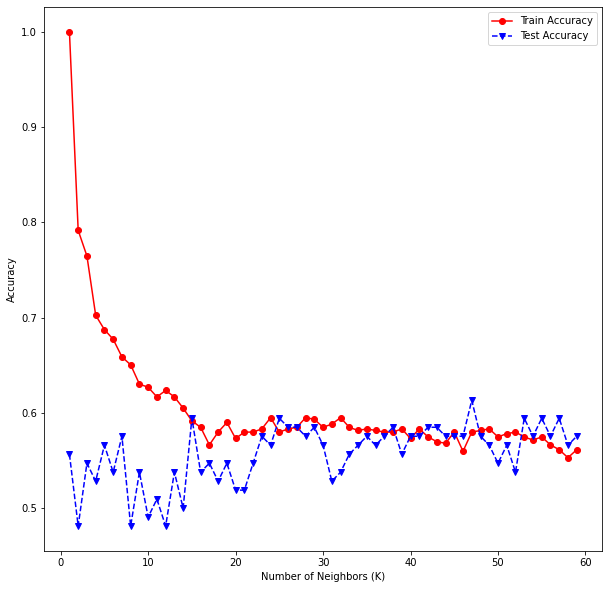

In [77]:
plt.figure(figsize = (10,10))
plt.plot(k,train_acc,'ro-',k,test_acc,'bv--')
plt.legend(['Train Accuracy','Test Accuracy'])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy');

In [81]:
knn_clf = KNeighborsClassifier(n_neighbors = 27, metric = 'minkowski', p = 2, algorithm = 'ball_tree', n_jobs = -1) # Euclidean Distance Metric
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_train, knn_clf.predict(X_train)))
knn_atr = accuracy_score(y_train, knn_clf.predict(X_train))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
knn_att = accuracy_score(y_test, y_pred)
print(confusion_matrix(y_test,knn_clf.predict(X_test)))
print(classification_report(y_test, knn_clf.predict(X_test)))
auc_dt = roc_auc_score(y_test, knn_clf.predict_proba(X_test)[:, 1])
print(auc_dt)

Train Accuracy:  0.5915966386554622
Test Accuracy:  0.5849056603773585
[[19 19]
 [25 43]]
              precision    recall  f1-score   support

           1       0.43      0.50      0.46        38
           2       0.69      0.63      0.66        68

    accuracy                           0.58       106
   macro avg       0.56      0.57      0.56       106
weighted avg       0.60      0.58      0.59       106

0.5715944272445821


# KNN Info Gain

In [82]:
KNN_eu_mt = KNeighborsClassifier()
grid_search_KNN_mt=GridSearchCV(estimator=KNN_eu_mt,param_grid=KNN_params_Eu,cv=10,n_jobs=-1,verbose=1)
grid_search_KNN_mt.fit(X_train_mt,y_train)

Fitting 10 folds for each of 244 candidates, totalling 2440 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski'], 'n_jobs': [-1],
                         'n_neighbors': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                         12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
                                         22, 23, 24, 25, 26, 27, 28, 29, ...],
                         'p': [2]},
             verbose=1)

In [83]:
grid_search_KNN_mt.best_estimator_

KNeighborsClassifier(n_jobs=-1, n_neighbors=25)

In [84]:
k = range(1, 60)
train_acc = []
test_acc = []
for x in k:
    knn_clf = KNeighborsClassifier(n_neighbors = x, metric = 'minkowski', p = 2, n_jobs = -1) # Euclidean Distance Metric
    knn_clf.fit(X_train_mt, y_train)
    y_pred = knn_clf.predict(X_test_mt)
    train_acc.append(accuracy_score(y_train, knn_clf.predict(X_train_mt)))
    test_acc.append(accuracy_score(y_test, y_pred))
    

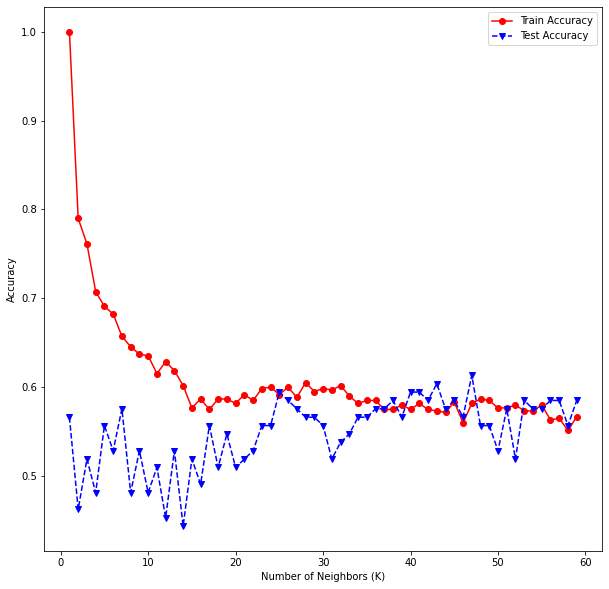

In [85]:
plt.figure(figsize = (10,10))
plt.plot(k,train_acc,'ro-',k,test_acc,'bv--')
plt.legend(['Train Accuracy','Test Accuracy'])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy');

In [86]:
knn_clf_mt = KNeighborsClassifier(n_neighbors = 25, metric = 'minkowski', p = 2, n_jobs = -1) # Euclidean Distance Metric
knn_clf_mt.fit(X_train_mt, y_train)
y_pred = knn_clf_mt.predict(X_test_mt)
print("Train Accuracy: ", accuracy_score(y_train, knn_clf_mt.predict(X_train_mt)))
knn_att_mt = accuracy_score(y_train, knn_clf_mt.predict(X_train_mt))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
knn_atr_mt = accuracy_score(y_test, y_pred)
print(confusion_matrix(y_test,knn_clf_mt.predict(X_test_mt)))
print(classification_report(y_test, knn_clf_mt.predict(X_test_mt)))
auc_dt = roc_auc_score(y_test, knn_clf_mt.predict_proba(X_test_mt)[:, 1])
print(auc_dt)

Train Accuracy:  0.5915966386554622
Test Accuracy:  0.5943396226415094
[[21 17]
 [26 42]]
              precision    recall  f1-score   support

           1       0.45      0.55      0.49        38
           2       0.71      0.62      0.66        68

    accuracy                           0.59       106
   macro avg       0.58      0.59      0.58       106
weighted avg       0.62      0.59      0.60       106

0.5686919504643965


# Accuracy visualization

In [87]:
xb_att
knn_att

0.5849056603773585

In [88]:
import numpy as np
import matplotlib.pyplot as plt
 
barWidth = 0.25
dt_att
dt_atr
rf_att
rf_atr
nb_att
nb_atr
xb_att
xb_atr
knn_att
knn_atr
test_list = [dt_att, rf_att,  xb_att*100, nb_att, knn_att*100]
train_list = [dt_atr, rf_atr,  xb_atr*100, nb_atr, knn_atr*100]

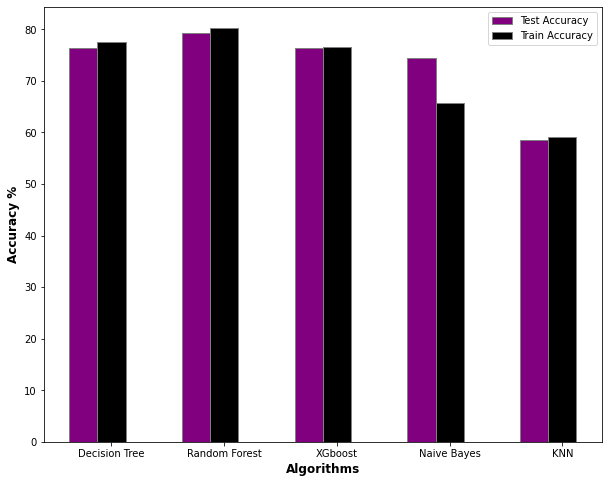

In [115]:
br1 = np.arange(len(test_list))
br2 = [x + barWidth for x in br1]
plt.subplots(figsize = (10,8))
plt.bar(br1, test_list, color ='purple', width = barWidth,
        edgecolor ='grey', label ='Test Accuracy')
plt.bar(br2, train_list, color ='black', width = barWidth,
        edgecolor ='grey', label ='Train Accuracy')
plt.xlabel('Algorithms', fontweight ='bold', fontsize = 12)
plt.ylabel('Accuracy %', fontweight ='bold', fontsize = 12)
plt.xticks([r + barWidth for r in range(len(test_list))],
        ['Decision Tree', 'Random Forest', 'XGboost', 'Naive Bayes', 'KNN'])
 
plt.legend()
plt.show()

In [90]:
barWidth = 0.25
dt_mt_att
dt_mt_atr
rf_mt_att
rf_mt_atr
nb_mt_att
nb_mt_atr
xb_mt_att
xb_mt_atr
knn_att_mt
knn_atr_mt
test_list_mt = [dt_mt_att, rf_mt_att,  xb_mt_att*100, nb_mt_att, knn_att_mt*100]
train_list_mt = [dt_mt_atr, rf_mt_atr,  xb_mt_atr*100, nb_mt_atr, knn_atr_mt*100]

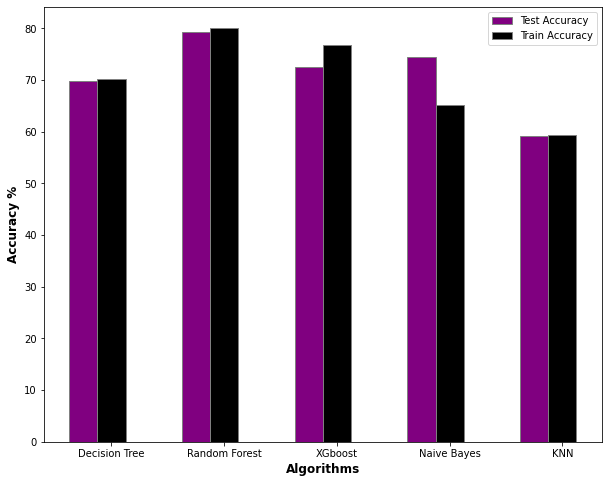

In [116]:
br1 = np.arange(len(test_list_mt))
br2 = [x + barWidth for x in br1]
plt.subplots(figsize = (10,8))
plt.bar(br1, test_list_mt, color ='purple', width = barWidth,
        edgecolor ='grey', label ='Test Accuracy')
plt.bar(br2, train_list_mt, color ='black', width = barWidth,
        edgecolor ='grey', label ='Train Accuracy')
plt.xlabel('Algorithms', fontweight ='bold', fontsize = 12)
plt.ylabel('Accuracy %', fontweight ='bold', fontsize = 12)
plt.xticks([r + barWidth for r in range(len(test_list_mt))],
        ['Decision Tree', 'Random Forest', 'XGboost', 'Naive Bayes', 'KNN'])
 
plt.legend()
plt.show()